In [1]:
path="/s/red/a/nobackup/cwc-ro/shadim/languages/"
run=1
import pandas as pd
language_accuracy=pd.read_csv('all_langs_overlap_train_test', sep=',', encoding='utf-8')
language_accuracy

,l1,l2,l1-name,l2-name,model_type,total tokens of l1,total tokens of l2,shared non-u in l1,shared non-u in l2,shared unique in both,non-un token overlap in l1,non-un token overlap in l2,eval_loss,precision,recall,f1_score
0,fr,br,french,breton,bert,49232,9406,9772,2194,638,0.198489,0.233255,0.441075,0.699962,0.790970,0.742688
1,fr,br,french,breton,xlmroberta,49232,9406,9772,2194,638,0.198489,0.233255,0.621834,0.621195,0.710555,0.662877
2,br,br,breton,breton,bert,37056,9406,19665,6806,3004,0.530683,0.723581,0.118994,0.922879,0.932494,0.927661
3,br,br,breton,breton,xlmroberta,37056,9406,19665,6806,3004,0.530683,0.723581,0.162250,0.879720,0.902503,0.890966
4,ar,fa,arabic,persian,bert,51951,14061,10314,2804,204,0.198533,0.199417,0.779249,0.411632,0.496859,0.450248
5,ar,fa,arabic,persian,xlmroberta,51951,14061,10314,2804,204,0.198533,0.199417,1.001664,0.390281,0.493581,0.435894
6,fa,fa,persian,persian,bert,56290,14061,33310,10016,2866,0.591757,0.712325,0.177870,0.896607,0.909588,0.903051
7,fa,fa,persian,persian,xlmroberta,56290,14061,33310,10016,2866,0.591757,0.712325,0.204876,0.887752,0.900847,0.894252
8,ar,hi,arabic,hindi,bert,51951,7961,8713,389,20,0.167716,0.048863,0.533682,0.635863,0.712376,0.671948
9,ar,hi,arabic,hindi,xlmroberta,51951,7961,8713,389,20,0.167716,0.048863,0.573971,0.628045,0.724717,0.672927


In [2]:
# import pandas as pd
# ner_perturb_bper=pd.DataFrame(columns=["l1","l2","l1-name","l2-name","model_type","total tokens of l1","total tokens of l2",
#                                      "shared non-u in l1","shared non-u in l2","shared unique in both",
#                                      "non-un token overlap in l1","non-un token overlap in l2",
#                                     "eval_loss","precision","recall","f1_score"])

# B-PER Wikipedia given-names perturbation

In [4]:
from simpletransformers.ner.ner_utils import read_examples_from_file
import random
import torch
from transformers import BertForTokenClassification
from transformers import XLMRobertaForTokenClassification
from SimpleTransformers import NERModel
perturb_type='B-PER'

for l_index,lang2 in language_accuracy.iterrows():
        language_source=lang2['l1']
        language_target=lang2['l2']
        print(language_source)
        print(language_target)
        if lang2['model_type']=='bert':
#             if not ((ner_perturb_bper['l1']==language_source)&(ner_perturb_bper['l2']==language_target)&(ner_perturb_bper['model_type']==lang2['model_type'])).any():
                outputdir_bert=path+'/ner_results_lan/'+language_source+'_'+language_target+'_bert'+str(run)
                model = NERModel(lang2['model_type'], 
                            'bert-base-multilingual-cased',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_bert, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=BertForTokenClassification.from_pretrained(outputdir_bert)
                testdataset=path+language_target+'/dataset_test1.txt'
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,language_target,language_source,run,perturb=True,perturb_type=perturb_type)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                      lang2["total tokens of l1"],lang2["total tokens of l2"],lang2["shared non-u in l1"],
                      lang2["shared non-u in l2"],lang2["shared unique in both"],
                      lang2["non-un token overlap in l1"],lang2["non-un token overlap in l2"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_bper.loc[l_index]=info


        if lang2['model_type']=='xlmroberta':
            if not ((ner_perturb_bper['l1']==language_source)&(ner_perturb_bper['l2']==language_target)&(ner_perturb_bper['model_type']==lang2['model_type'])).any():
                outputdir_xlmr=path+'/ner_results_lan/'+language_source+'_'+language_target+'_xlmroberta'+str(run)
                model = NERModel(lang2['model_type'], 
                            'xlm-roberta-base',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_xlmr, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=XLMRobertaForTokenClassification.from_pretrained(outputdir_xlmr)
                testdataset=path+language_target+'/dataset_test1.txt'
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,language_target,language_source,run,perturb=True,perturb_type=perturb_type)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                      lang2["total tokens of l1"],lang2["total tokens of l2"],lang2["shared non-u in l1"],
                      lang2["shared non-u in l2"],lang2["shared unique in both"],
                      lang2["non-un token overlap in l1"],lang2["non-un token overlap in l2"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_bper.loc[l_index]=info

/s/babbage/b/nobackup/nblancha/merry/conda/envs/mbert_ner/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


fr
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

1
2
5
6
7
8
9
10


  0%|          | 0/3401 [00:00<?, ?it/s]

11
3


  0%|          | 0/426 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [46]:
ner_perturb_bper.to_csv('all_langs_B_PER',sep=',', encoding='utf-8',index=False)
ner_perturb_bper.to_excel('all_langs_B_PER.xlsx')

In [28]:
import pandas as pd
from simpletransformers.ner.ner_utils import read_examples_from_file
import random
import torch
perturb_type='B-PER'
f1_bper=pd.DataFrame(columns=["l1","l2","model_type","main f1-score P-BER","perturbution f1-score P-BER"])
for l_index,lang2 in language_accuracy.iterrows():

        language_source=lang2['l1']
        language_target=lang2['l2']
        model_type=lang2['model_type']
        file=open('{}ner_results_lan/{}_{}_{}{}/eval_results.txt'.format(path,language_source,language_target,model_type,run),'r')
        for line in file.readlines():
            if 'PER' in line:
                main_f1=line.strip().split()[-2]
        file=open('{}ner_results_lan/{}_{}_{}{}/eval_results{}_{}.txt'.format(path,language_source,language_target,model_type,run,run,perturb_type),'r')
        for line in file.readlines():
            if 'PER' in line:
                perturb_f1=line.strip().split()[-2]
        info=[language_source,language_target,model_type,main_f1,perturb_f1]
        f1_bper.loc[len(f1_bper_bper.index)]=info

In [29]:
f1_bper.to_csv('f1_bper',sep=',', encoding='utf-8',index=False)
f1_bper.to_excel('f1_bper.xlsx')

# LOC Wikipedia places perturbation

In [5]:
import pandas as pd
ner_perturb_loc=pd.DataFrame(columns=["l1","l2","l1-name","l2-name","model_type","total tokens of l1","total tokens of l2",
                                     "shared non-u in l1","shared non-u in l2","shared unique in both",
                                     "non-un token overlap in l1","non-un token overlap in l2",
                                    "eval_loss","precision","recall","f1_score"])

In [6]:
# import pandas as pd
# ner_perturb_loc=pd.read_csv('all_langs_B_PER', sep=',', encoding='utf-8')
# ner_perturb_loc

In [7]:
from simpletransformers.ner.ner_utils import read_examples_from_file
import random
import torch
from transformers import BertForTokenClassification
from transformers import XLMRobertaForTokenClassification
from SimpleTransformers import NERModel
perturb_type='LOC'

for l_index,lang2 in language_accuracy.iterrows():
        language_source=lang2['l1']
        language_target=lang2['l2']
        print(language_source)
        print(language_target)
        if lang2['model_type']=='bert':
            if not ((ner_perturb_loc['l1']==language_source)&(ner_perturb_loc['l2']==language_target)&(ner_perturb_loc['model_type']==lang2['model_type'])).any():
                outputdir_bert=path+'/ner_results_lan/'+language_source+'_'+language_target+'_bert'+str(run)
                model = NERModel(lang2['model_type'], 
                            'bert-base-multilingual-cased',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_bert, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=BertForTokenClassification.from_pretrained(outputdir_bert)
                testdataset=path+language_target+'/dataset_test1.txt'
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,language_target,run,perturb=True,perturb_type=perturb_type)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                      lang2["total tokens of l1"],lang2["total tokens of l2"],lang2["shared non-u in l1"],
                      lang2["shared non-u in l2"],lang2["shared unique in both"],
                      lang2["non-un token overlap in l1"],lang2["non-un token overlap in l2"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_loc.loc[l_index]=info


        if lang2['model_type']=='xlmroberta':
            if not ((ner_perturb_loc['l1']==language_source)&(ner_perturb_loc['l2']==language_target)&(ner_perturb_loc['model_type']==lang2['model_type'])).any():
                outputdir_xlmr=path+'/ner_results_lan/'+language_source+'_'+language_target+'_xlmroberta'+str(run)
                model = NERModel(lang2['model_type'], 
                            'xlm-roberta-base',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_xlmr, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=XLMRobertaForTokenClassification.from_pretrained(outputdir_xlmr)
                testdataset=path+language_target+'/dataset_test1.txt'
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,language_target,run,perturb=True,perturb_type=perturb_type)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                      lang2["total tokens of l1"],lang2["total tokens of l2"],lang2["shared non-u in l1"],
                      lang2["shared non-u in l2"],lang2["shared unique in both"],
                      lang2["non-un token overlap in l1"],lang2["non-un token overlap in l2"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_loc.loc[l_index]=info

/s/babbage/b/nobackup/nblancha/merry/conda/envs/mbert_ner/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


fr
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fr', 'br', 'french', 'breton', 'bert', 49232, 9406, 9772, 2194, 638, 0.1984887877803055, 0.2332553689134595, 0.45141803829366683, 0.7112690355329949, 0.7601996527777778, 0.7349208014266233]
fr
br


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fr', 'br', 'french', 'breton', 'xlmroberta', 49232, 9406, 9772, 2194, 638, 0.1984887877803055, 0.2332553689134595, 0.6217112361842618, 0.6526271893244371, 0.6796959826275787, 0.6658866078076799]
br
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['br', 'br', 'breton', 'breton', 'bert', 37056, 9406, 19665, 6806, 3004, 0.5306832901554405, 0.7235806931745694, 0.197781502382891, 0.9201037002121141, 0.8472222222222222, 0.8821602078861146]
br
br


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['br', 'br', 'breton', 'breton', 'xlmroberta', 37056, 9406, 19665, 6806, 3004, 0.5306832901554405, 0.7235806931745694, 0.21485642027361274, 0.8934369997713241, 0.8487942646100369, 0.8705436720142602]
ar
fa


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ar', 'fa', 'arabic', 'persian', 'bert', 51951, 14061, 10314, 2804, 204, 0.1985332332390136, 0.1994168266837351, 1.1257102772453582, 0.4193706981317601, 0.4778711484593838, 0.446713799423933]
ar
fa


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ar', 'fa', 'arabic', 'persian', 'xlmroberta', 51951, 14061, 10314, 2804, 204, 0.1985332332390136, 0.1994168266837351, 1.3821377659067862, 0.38137304391721355, 0.42324929971988795, 0.4012214551248009]
fa
fa


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fa', 'fa', 'persian', 'persian', 'bert', 56290, 14061, 33310, 10016, 2866, 0.5917569728193285, 0.7123248702083778, 0.21197936229600173, 0.8887959866220736, 0.8932773109243698, 0.8910310142497904]
fa
fa


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fa', 'fa', 'persian', 'persian', 'xlmroberta', 56290, 14061, 33310, 10016, 2866, 0.5917569728193285, 0.7123248702083778, 0.23959256896963388, 0.8700721821210439, 0.8778711484593837, 0.8739542665923034]
ar
hi


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['ar', 'hi', 'arabic', 'hindi', 'bert', 51951, 7961, 8713, 389, 20, 0.1677157321322015, 0.0488632081396809, 0.48296658460654923, 0.6582159624413145, 0.7221840659340659, 0.6887178647453741]
ar
hi


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['ar', 'hi', 'arabic', 'hindi', 'xlmroberta', 51951, 7961, 8713, 389, 20, 0.1677157321322015, 0.0488632081396809, 0.49633249341560576, 0.6708860759493671, 0.7462225274725275, 0.7065517801983418]
hi
hi


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['hi', 'hi', 'hindi', 'hindi', 'bert', 32212, 7961, 21568, 6751, 2746, 0.6695641375884763, 0.8480090440899385, 0.21883934672616698, 0.86743711760707, 0.8763736263736264, 0.8718824735223778]
hi
hi


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['hi', 'hi', 'hindi', 'hindi', 'xlmroberta', 32212, 7961, 21568, 6751, 2746, 0.6695641375884763, 0.8480090440899385, 0.2096540327136707, 0.880315500685871, 0.8815247252747253, 0.8809196980096088]
en
sco


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['en', 'sco', 'english', 'scots', 'bert', 55156, 5664, 10393, 1427, 440, 0.1884291826818478, 0.2519420903954802, 0.37725957383405523, 0.7401026392961877, 0.7005551700208189, 0.7197860962566845]
en
sco


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['en', 'sco', 'english', 'scots', 'xlmroberta', 55156, 5664, 10393, 1427, 440, 0.1884291826818478, 0.2519420903954802, 0.5679881308886985, 0.6457187745483111, 0.5712300208478109, 0.6061946902654867]
sco
sco


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['sco', 'sco', 'scots', 'scots', 'bert', 21982, 5664, 12509, 4197, 1740, 0.56905650077336, 0.7409957627118644, 0.2813375593774373, 0.9032913449817147, 0.7713393476752255, 0.8321167883211678]
sco
sco


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['sco', 'sco', 'scots', 'scots', 'xlmroberta', 21982, 5664, 12509, 4197, 1740, 0.56905650077336, 0.7409957627118644, 0.32988514556499665, 0.886626746506986, 0.7722531293463143, 0.8254971194945178]
en
cy


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['en', 'cy', 'english', 'welsh', 'bert', 55156, 12356, 8724, 2727, 399, 0.1581695554427442, 0.2207024927160893, 0.4644685638937312, 0.6235871187886542, 0.6854195968120019, 0.6530429927414851]
en
cy


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['en', 'cy', 'english', 'welsh', 'xlmroberta', 55156, 12356, 8724, 2727, 399, 0.1581695554427442, 0.2207024927160893, 0.48263087573115815, 0.6212966938600257, 0.6783872480075012, 0.6485880770954728]
cy
cy


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cy', 'cy', 'welsh', 'welsh', 'bert', 49992, 12356, 36212, 10340, 2539, 0.724355896943511, 0.8368404014244092, 0.20019298554354395, 0.9122401847575058, 0.8333333333333334, 0.8710033076074972]
cy
cy


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cy', 'cy', 'welsh', 'welsh', 'xlmroberta', 49992, 12356, 36212, 10340, 2539, 0.724355896943511, 0.8368404014244092, 0.26093338970029334, 0.9058450145464163, 0.8028598218471636, 0.8512489126382503]
es
ca


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['es', 'ca', 'spanish', 'catalan', 'bert', 51310, 11015, 16627, 4050, 1182, 0.3240498928084194, 0.3676804357694053, 0.2527763490420832, 0.8690935390549662, 0.8756376001943162, 0.8723532970356926]
es
ca


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['es', 'ca', 'spanish', 'catalan', 'xlmroberta', 51310, 11015, 16627, 4050, 1182, 0.3240498928084194, 0.3676804357694053, 0.32834405120147364, 0.828436018957346, 0.8491620111731844, 0.8386709847667028]
ca
ca


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ca', 'ca', 'catalan', 'catalan', 'bert', 43094, 11015, 19137, 6445, 2572, 0.4440757414025154, 0.5851112119836587, 0.16591374545484922, 0.9207361963190184, 0.9113432110760262, 0.916015625]
ca
ca


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ca', 'ca', 'catalan', 'catalan', 'xlmroberta', 43094, 11015, 19137, 6445, 2572, 0.4440757414025154, 0.5851112119836587, 0.22861841676741437, 0.8858548585485855, 0.8746660189458344, 0.8802248838914691]
cs
sk


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cs', 'sk', 'czech', 'slovak', 'bert', 41638, 10079, 10006, 3986, 1514, 0.2403093328209808, 0.3954757416410358, 0.19709792975642382, 0.8652466855031515, 0.8749450549450549, 0.8700688449349798]
cs
sk


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cs', 'sk', 'czech', 'slovak', 'xlmroberta', 41638, 10079, 10006, 3986, 1514, 0.2403093328209808, 0.3954757416410358, 0.18677424984883534, 0.8577981651376146, 0.863266652011431, 0.8605237208283115]
sk
sk


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['sk', 'sk', 'slovak', 'slovak', 'bert', 40353, 10079, 20123, 6719, 2958, 0.4986742001833816, 0.6666335946026392, 0.12626008311695935, 0.9140070921985816, 0.9063736263736264, 0.9101743544471419]
sk
sk


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['sk', 'sk', 'slovak', 'slovak', 'xlmroberta', 40353, 10079, 20123, 6719, 2958, 0.4986742001833816, 0.6666335946026392, 0.15286286341293143, 0.9084776253654149, 0.888107276324467, 0.8981769675411294]
id
ms


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['id', 'ms', 'indonesian', 'malay', 'bert', 46930, 12610, 15019, 5280, 910, 0.3200298316641807, 0.4187153053132434, 0.6717739170165776, 0.7772020725388601, 0.756570215025219, 0.7667473769168685]
id
ms


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['id', 'ms', 'indonesian', 'malay', 'xlmroberta', 46930, 12610, 15019, 5280, 910, 0.3200298316641807, 0.4187153053132434, 0.5352003923661027, 0.804681194511703, 0.7940005309264667, 0.7993051843933726]
ms
ms


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ms', 'ms', 'malay', 'malay', 'bert', 50870, 12610, 39237, 10793, 1884, 0.7713190485551406, 0.8559080095162569, 0.4245175766302797, 0.8443357783211084, 0.825059729227502, 0.8345864661654135]
ms
ms


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ms', 'ms', 'malay', 'malay', 'xlmroberta', 50870, 12610, 39237, 10793, 1884, 0.7713190485551406, 0.8559080095162569, 0.2997000903867299, 0.9042669584245077, 0.877621449429254, 0.8907449818132829]
fr
oc


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['fr', 'oc', 'french', 'occitan', 'bert', 49232, 8085, 9019, 1909, 293, 0.1831938576535586, 0.2361162646876932, 0.18558226072616946, 0.8767158767158767, 0.9053222786841402, 0.8907894736842105]
fr
oc


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['fr', 'oc', 'french', 'occitan', 'xlmroberta', 49232, 8085, 9019, 1909, 293, 0.1831938576535586, 0.2361162646876932, 0.3298693246210333, 0.7685467479674797, 0.8090398502273335, 0.7882736156351792]
oc
oc


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['oc', 'oc', 'occitan', 'occitan', 'bert', 32413, 8085, 14631, 4935, 2083, 0.4513929596149693, 0.6103896103896104, 0.0859624454307829, 0.9555851063829788, 0.9609521262369618, 0.9582611014801974]
oc
oc


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['oc', 'oc', 'occitan', 'occitan', 'xlmroberta', 32413, 8085, 14631, 4935, 2083, 0.4513929596149693, 0.6103896103896104, 0.11124881673752865, 0.9402748414376322, 0.9515913345814389, 0.9458992423235411]
nl
af


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['nl', 'af', 'dutch', 'african', 'bert', 40853, 7979, 7570, 2519, 760, 0.1852985092894034, 0.3157037222709613, 0.19711174514849444, 0.7975818219720658, 0.8821766197832603, 0.8377490694109919]
nl
af


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['nl', 'af', 'dutch', 'african', 'xlmroberta', 40853, 7979, 7570, 2519, 760, 0.1852985092894034, 0.3157037222709613, 0.2024760633581192, 0.7782909930715936, 0.8555273482575583, 0.8150835532102023]
af
af


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['af', 'af', 'african', 'african', 'bert', 32699, 7979, 21189, 6570, 2740, 0.6480014679347992, 0.8234114550695576, 0.0872356029183327, 0.9216728280961183, 0.9197602029052341, 0.9207155222158108]
af
af


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['af', 'af', 'african', 'african', 'xlmroberta', 32699, 7979, 21189, 6570, 2740, 0.6480014679347992, 0.8234114550695576, 0.09975685835092303, 0.8972741608470376, 0.919649041791734, 0.9083238312428734]
it
scn


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['it', 'scn', 'italian', 'sicilian', 'bert', 44077, 3521, 5222, 1520, 319, 0.1184744878281189, 0.4316955410394774, 0.43774613180699257, 0.7907986111111112, 0.8133928571428571, 0.80193661971831]
it
scn


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['it', 'scn', 'italian', 'sicilian', 'xlmroberta', 44077, 3521, 5222, 1520, 319, 0.1184744878281189, 0.4316955410394774, 0.5964512512804224, 0.7286084701815039, 0.7526785714285714, 0.7404479578392621]
scn
scn


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['scn', 'scn', 'sicilian', 'sicilian', 'bert', 14217, 3521, 10125, 3053, 1104, 0.712175564465077, 0.8670832149957398, 0.3161932464984532, 0.8805704099821747, 0.8821428571428571, 0.8813559322033898]
scn
scn


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['scn', 'scn', 'sicilian', 'sicilian', 'xlmroberta', 14217, 3521, 10125, 3053, 1104, 0.712175564465077, 0.8670832149957398, 0.4253913849054907, 0.8240495137046862, 0.8321428571428572, 0.8280764104842294]
es
an


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['es', 'an', 'spanish', 'aragonese', 'bert', 51310, 8861, 14580, 4099, 712, 0.2841551354511791, 0.462588872587744, 0.2614375395391359, 0.8398932621747832, 0.8561713702822169, 0.8479542010439468]
es
an


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['es', 'an', 'spanish', 'aragonese', 'xlmroberta', 51310, 8861, 14580, 4099, 712, 0.2841551354511791, 0.462588872587744, 0.2669690991605415, 0.8691460055096418, 0.8582114926895614, 0.8636441402908469]
an
an


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['an', 'an', 'aragonese', 'aragonese', 'bert', 35077, 8861, 25848, 7835, 2193, 0.7368931208484192, 0.8842117142534702, 0.23401549567048197, 0.8876712328767123, 0.8813328799727984, 0.8844907012455212]
an
an


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['an', 'an', 'aragonese', 'aragonese', 'xlmroberta', 35077, 8861, 25848, 7835, 2193, 0.7368931208484192, 0.8842117142534702, 0.16053253020260208, 0.9249320652173914, 0.925875552533152, 0.9254035683942227]
es
ast


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['es', 'ast', 'spanish', 'asturian', 'bert', 51310, 3309, 14039, 1577, 457, 0.2736113817969207, 0.4765790268963433, 0.2262741999168481, 0.8775629759812537, 0.904043452021726, 0.8906064209274672]
es
ast


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['es', 'ast', 'spanish', 'asturian', 'xlmroberta', 51310, 3309, 14039, 1577, 457, 0.2736113817969207, 0.4765790268963433, 0.28867731483187525, 0.8405296488198043, 0.8811104405552203, 0.8603417796110784]
ast
ast


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['ast', 'ast', 'asturian', 'asturian', 'bert', 13426, 3309, 8913, 2617, 813, 0.6638611649039178, 0.790873375642188, 0.09560047571264607, 0.940677966101695, 0.9378394689197345, 0.9392565729827742]
ast
ast


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['ast', 'ast', 'asturian', 'asturian', 'xlmroberta', 13426, 3309, 8913, 2617, 813, 0.6638611649039178, 0.790873375642188, 0.15865438011408384, 0.8918439716312057, 0.9106819553409776, 0.9011645267243954]


In [9]:
ner_perturb_loc.to_csv('all_langs_LOC',sep=',', encoding='utf-8',index=False)
ner_perturb_loc.to_excel('all_langs_LOC.xlsx')

In [10]:
import pandas as pd
from simpletransformers.ner.ner_utils import read_examples_from_file
import random
import torch
perturb_type='LOC'
f1_loc=pd.DataFrame(columns=["l1","l2","model_type","main f1-score LOC","perturbution f1-score LOC"])
for l_index,lang2 in language_accuracy.iterrows():

        language_source=lang2['l1']
        language_target=lang2['l2']
        model_type=lang2['model_type']
        file=open('{}ner_results_lan/{}_{}_{}{}/eval_results.txt'.format(path,language_source,language_target,model_type,run),'r')
        for line in file.readlines():
            if 'LOC' in line:
                main_f1=line.strip().split()[-2]
        file=open('{}ner_results_lan/{}_{}_{}{}/eval_results{}_{}.txt'.format(path,language_source,language_target,model_type,run,run,perturb_type),'r')
        for line in file.readlines():
            if 'LOC' in line:
                perturb_f1=line.strip().split()[-2]
        info=[language_source,language_target,model_type,main_f1,perturb_f1]
        f1_loc.loc[len(f1_bper_loc.index)]=info

In [11]:
f1_loc.to_csv('f1_loc',sep=',', encoding='utf-8',index=False)
f1_loc.to_excel('f1_loc.xlsx')

# Perturbation 1

In [5]:
import pandas as pd
from simpletransformers.ner.ner_utils import read_examples_from_file

ner_perturb_unknownentity=pd.DataFrame(columns=["l1","l2","l1-name","l2-name","model_type","total tokens of l1","total tokens of l2",
                                     "shared non-u in l1","shared non-u in l2","shared unique in both",
                                     "non-un token overlap in l1","non-un token overlap in l2",
                                    "eval_loss","precision","recall","f1_score"])
import random
import torch
from transformers import BertForTokenClassification
from transformers import XLMRobertaForTokenClassification
from SimpleTransformers import NERModel
perturb_type='unknownentity'

for l_index,lang2 in language_accuracy.iterrows():
        language_source=lang2['l1']
        language_target=lang2['l2']
        print(language_source)
        print(language_target)
        if lang2['model_type']=='bert':
            if not ((ner_perturb_unknownentity['l1']==language_source)&(ner_perturb_unknownentity['l2']==language_target)&(ner_perturb_unknownentity['model_type']==lang2['model_type'])).any():
                outputdir_bert=path+'/ner_results_lan/'+language_source+'_'+language_target+'_bert'+str(run)
                model = NERModel(lang2['model_type'], 
                            'bert-base-multilingual-cased',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_bert, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=BertForTokenClassification.from_pretrained(outputdir_bert)
                testdataset=path+language_target+'/dataset_test1.txt'
                out_overlap=dict()
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,lang=language_target,run=run,perturb=True,perturb_type=perturb_type,source_lang=language_source,out_overlap=out_overlap)
                out_overlap
                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                      out_overlap["total_tokens_of_l1"],out_overlap["total_tokens_of_l1"],out_overlap["shared_non-u_in_l1"],
                      out_overlap["shared_non-u_in_l2"],out_overlap["shared_unique_in_both"],
                      out_overlap["non-un_token_overlap_in_l1"],out_overlap["non-un_token_overlap_in_l2"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_unknownentity.loc[l_index]=info


        if lang2['model_type']=='xlmroberta':
            if not ((ner_perturb_unknownentity['l1']==language_source)&(ner_perturb_unknownentity['l2']==language_target)&(ner_perturb_unknownentity['model_type']==lang2['model_type'])).any():
                outputdir_xlmr=path+'/ner_results_lan/'+language_source+'_'+language_target+'_xlmroberta'+str(run)
                model = NERModel(lang2['model_type'], 
                            'xlm-roberta-base',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_xlmr, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=XLMRobertaForTokenClassification.from_pretrained(outputdir_xlmr)
                testdataset=path+language_target+'/dataset_test1.txt'
                out_overlap=dict()
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,lang=language_target,run=run,perturb=True,perturb_type=perturb_type,source_lang=language_source,out_overlap=out_overlap)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                      out_overlap["total_tokens_of_l1"],out_overlap["total_tokens_of_l2"],out_overlap["shared_non-u_in_l1"],
                      out_overlap["shared_non-u_in_l2"],out_overlap["shared_unique_in_both"],
                      out_overlap["non-un_token_overlap_in_l1"],out_overlap["non-un_token_overlap_in_l2"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_unknownentity.loc[l_index]=info

/s/babbage/b/nobackup/nblancha/merry/conda/envs/mbert_ner/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


fr
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_fr1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fr', 'br', 'french', 'breton', 'bert', 14496, 14496, 225, 225, 225, 0.06573181419807186, 0.015521523178807946, 0.45071237230183725, 0.6898201301186376, 0.7825048838723682, 0.7332451947523646]
fr
br


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_fr1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fr', 'br', 'french', 'breton', 'xlmroberta', 14496, 14496, 225, 225, 225, 0.06573181419807186, 0.015521523178807946, 0.6436307640186568, 0.6055028462998102, 0.6942993907745866, 0.6468680316237584]
br
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_br1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_br1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['br', 'br', 'breton', 'breton', 'bert', 3423, 3423, 1688, 1688, 1688, 0.4931346771837569, 0.4931346771837569, 0.27112002591651696, 0.838592750533049, 0.8516673884798615, 0.8450795015040826]
br
br


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_br1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_br1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['br', 'br', 'breton', 'breton', 'xlmroberta', 3423, 3423, 1688, 1688, 1688, 0.4931346771837569, 0.4931346771837569, 0.27706651708839175, 0.798744769874477, 0.828019952288007, 0.8131189436694708]
ar
fa


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_ar1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ar', 'fa', 'arabic', 'persian', 'bert', 11935, 11935, 4, 4, 4, 0.0012804097311139564, 0.00033514872224549644, 0.7791686170677624, 0.4117247623358986, 0.49685878175361925, 0.4503032553533854]
ar
fa


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_ar1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ar', 'fa', 'arabic', 'persian', 'xlmroberta', 11935, 11935, 4, 4, 4, 0.0012804097311139564, 0.00033514872224549644, 1.0016441046492035, 0.38998056575253726, 0.4933078393881453, 0.4356005788712011]
fa
fa


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_fa1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_fa1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fa', 'fa', 'persian', 'persian', 'bert', 3124, 3124, 715, 715, 715, 0.22887323943661972, 0.22887323943661972, 0.23470768433238026, 0.8540223761321257, 0.875717017208413, 0.864733648010789]
fa
fa


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_fa1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_fa1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fa', 'fa', 'persian', 'persian', 'xlmroberta', 3124, 3124, 715, 715, 715, 0.22887323943661972, 0.22887323943661972, 0.2778234313195134, 0.8441662226957911, 0.8656104889374487, 0.8547538772757923]
ar
hi


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_ar1.txt r


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['ar', 'hi', 'arabic', 'hindi', 'bert', 11935, 11935, 0, 0, 0, 0.0, 0.0, 0.5336818090463812, 0.6358629130966952, 0.7123757284881728, 0.6719482619240097]
ar
hi


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_ar1.txt r


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['ar', 'hi', 'arabic', 'hindi', 'xlmroberta', 11935, 11935, 0, 0, 0, 0.0, 0.0, 0.5739705690963043, 0.6280451574569221, 0.7247171751799795, 0.6729269457265638]
hi
hi


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_hi1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_hi1.txt r


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['hi', 'hi', 'hindi', 'hindi', 'bert', 1909, 1909, 1229, 1229, 1229, 0.64379256155055, 0.64379256155055, 0.5006693249939613, 0.6940032414910859, 0.7324666438590489, 0.71271637816245]
hi
hi


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_hi1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_hi1.txt r


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['hi', 'hi', 'hindi', 'hindi', 'xlmroberta', 1909, 1909, 1229, 1229, 1229, 0.64379256155055, 0.64379256155055, 0.4213217929197551, 0.7544731610337972, 0.7787277701778386, 0.7664086166273982]
en
sco


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_en1.txt r


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['en', 'sco', 'english', 'scots', 'bert', 16953, 16953, 255, 255, 255, 0.1291139240506329, 0.015041585560077862, 0.3874826957567484, 0.6908611019465523, 0.7293625914315569, 0.7095899695018638]
en
sco


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_en1.txt r


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['en', 'sco', 'english', 'scots', 'xlmroberta', 16953, 16953, 255, 255, 255, 0.1291139240506329, 0.015041585560077862, 0.5475612632286402, 0.6090621707060063, 0.6031304347826087, 0.6060817895840614]
sco
sco


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_sco1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_sco1.txt r


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['sco', 'sco', 'scots', 'scots', 'bert', 1975, 1975, 968, 968, 968, 0.490126582278481, 0.490126582278481, 0.27204402784793924, 0.8066850447966919, 0.8122831367106176, 0.8094744121715076]
sco
sco


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_sco1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_sco1.txt r


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['sco', 'sco', 'scots', 'scots', 'xlmroberta', 1975, 1975, 968, 968, 968, 0.490126582278481, 0.490126582278481, 0.2956391458932326, 0.7831769436997319, 0.8097713097713097, 0.7962521294718908]
en
cy


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_en1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['en', 'cy', 'english', 'welsh', 'bert', 16953, 16953, 116, 116, 116, 0.047874535699546014, 0.0068424467645844395, 0.6598676531072794, 0.5542328042328042, 0.6868852459016394, 0.6134699853587117]
en
cy


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_en1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['en', 'cy', 'english', 'welsh', 'xlmroberta', 16953, 16953, 116, 116, 116, 0.047874535699546014, 0.0068424467645844395, 0.7978973267993457, 0.5389419544452608, 0.6871194379391101, 0.6040765904879556]
cy
cy


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_cy1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_cy1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cy', 'cy', 'welsh', 'welsh', 'bert', 2423, 2423, 1230, 1230, 1230, 0.5076351630210483, 0.5076351630210483, 0.327497384797327, 0.75, 0.7920954162768943, 0.7704731574158324]
cy
cy


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_cy1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_cy1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cy', 'cy', 'welsh', 'welsh', 'xlmroberta', 2423, 2423, 1230, 1230, 1230, 0.5076351630210483, 0.5076351630210483, 0.31521033622245764, 0.7476319350473613, 0.7741709481550677, 0.7606700321248279]
es
ca


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_es1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['es', 'ca', 'spanish', 'catalan', 'bert', 12473, 12473, 248, 248, 248, 0.07343796268877702, 0.0198829471658783, 0.29885572124657356, 0.8221343873517787, 0.8580441640378549, 0.8397055331275232]
es
ca


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_es1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['es', 'ca', 'spanish', 'catalan', 'xlmroberta', 12473, 12473, 248, 248, 248, 0.07343796268877702, 0.0198829471658783, 0.3623188980395945, 0.7831242873432155, 0.8338999514327343, 0.8077149241444195]
ca
ca


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_ca1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_ca1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ca', 'ca', 'catalan', 'catalan', 'bert', 3377, 3377, 858, 858, 858, 0.254071661237785, 0.254071661237785, 0.22613402440687072, 0.8615639026695016, 0.8847646773410965, 0.8730101735487732]
ca
ca


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_ca1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_ca1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ca', 'ca', 'catalan', 'catalan', 'xlmroberta', 3377, 3377, 858, 858, 858, 0.254071661237785, 0.254071661237785, 0.2974011179946796, 0.8213780084945729, 0.8451080359310512, 0.8330740696422162]
cs
sk


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_cs1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_cs1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cs', 'sk', 'czech', 'slovak', 'bert', 11965, 11965, 599, 599, 599, 0.17653993516062483, 0.050062682824905974, 0.27490878572109256, 0.7637973640856672, 0.8061291023690502, 0.7843925134820768]
cs
sk


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_cs1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_cs1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cs', 'sk', 'czech', 'slovak', 'xlmroberta', 11965, 11965, 599, 599, 599, 0.17653993516062483, 0.050062682824905974, 0.3397016862913979, 0.7193824327143751, 0.7498912570682905, 0.7343200937067406]
sk
sk


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_sk1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_sk1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['sk', 'sk', 'slovak', 'slovak', 'bert', 3393, 3393, 1317, 1317, 1317, 0.3881520778072502, 0.3881520778072502, 0.18574326480831732, 0.8596604341285192, 0.8682439765574126, 0.8639308855291576]
sk
sk


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_sk1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_sk1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['sk', 'sk', 'slovak', 'slovak', 'xlmroberta', 3393, 3393, 1317, 1317, 1317, 0.3881520778072502, 0.3881520778072502, 0.23909900830009242, 0.8036732108929703, 0.826889661164205, 0.8151161545873034]
id
ms


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_id1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_id1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['id', 'ms', 'indonesian', 'malay', 'bert', 8525, 8525, 218, 218, 218, 0.1236528644356211, 0.02557184750733138, 0.5661050433931356, 0.5957304869913276, 0.7107986203236933, 0.6481974352770384]
id
ms


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_id1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_id1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['id', 'ms', 'indonesian', 'malay', 'xlmroberta', 8525, 8525, 218, 218, 218, 0.1236528644356211, 0.02557184750733138, 0.4462627494432242, 0.609881511289962, 0.7234155396446565, 0.6618146530810286]
ms
ms


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_ms1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_ms1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ms', 'ms', 'malay', 'malay', 'bert', 1763, 1763, 678, 678, 678, 0.38457175269427113, 0.38457175269427113, 0.354049644102572, 0.7957286432160804, 0.840053050397878, 0.8172903225806453]
ms
ms


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_ms1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_ms1.txt r


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ms', 'ms', 'malay', 'malay', 'xlmroberta', 1763, 1763, 678, 678, 678, 0.38457175269427113, 0.38457175269427113, 0.4326355659158052, 0.6762285445567835, 0.7624602332979852, 0.7167601246105919]
fr
oc


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_fr1.txt r


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['fr', 'oc', 'french', 'occitan', 'bert', 14496, 14496, 78, 78, 78, 0.023629203271735837, 0.005380794701986755, 0.261636417813216, 0.8138001014713343, 0.8570665241784665, 0.8348731294729993]
fr
oc


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_fr1.txt r


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['fr', 'oc', 'french', 'occitan', 'xlmroberta', 14496, 14496, 78, 78, 78, 0.023629203271735837, 0.005380794701986755, 0.3949815030264763, 0.6840705825477399, 0.7560780122896072, 0.7182741116751269]
oc
oc


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_oc1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_oc1.txt r


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['oc', 'oc', 'occitan', 'occitan', 'bert', 3301, 3301, 1122, 1122, 1122, 0.3398970009088155, 0.3398970009088155, 0.1376704970732068, 0.9143979057591624, 0.9327102803738317, 0.9234633179114343]
oc
oc


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_oc1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_oc1.txt r


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['oc', 'oc', 'occitan', 'occitan', 'xlmroberta', 3301, 3301, 1122, 1122, 1122, 0.3398970009088155, 0.3398970009088155, 0.14961913134469254, 0.9031754294638209, 0.9263214095034704, 0.9146020031628888]
nl
af


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_nl1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_nl1.txt r


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['nl', 'af', 'dutch', 'african', 'bert', 13210, 13210, 370, 370, 370, 0.14346645986816595, 0.028009084027252083, 0.24268501040123, 0.7409368635437882, 0.8334478808705613, 0.7844743935309973]
nl
af


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_nl1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_nl1.txt r


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['nl', 'af', 'dutch', 'african', 'xlmroberta', 13210, 13210, 370, 370, 370, 0.14346645986816595, 0.028009084027252083, 0.25410394622201754, 0.7341099529940731, 0.8265071329958582, 0.777573330447018]
af
af


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_af1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_af1.txt r


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['af', 'af', 'african', 'african', 'bert', 2579, 2579, 1683, 1683, 1683, 0.6525785188057387, 0.6525785188057387, 0.2039736618426301, 0.8050484561640748, 0.8168305511090784, 0.8108967082860385]
af
af


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_af1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_af1.txt r


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['af', 'af', 'african', 'african', 'xlmroberta', 2579, 2579, 1683, 1683, 1683, 0.6525785188057387, 0.6525785188057387, 0.22469224571187452, 0.7613935144609991, 0.7973841211564938, 0.7789733243667338]
it
scn


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_it1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_it1.txt r


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['it', 'scn', 'italian', 'sicilian', 'bert', 12332, 12332, 90, 90, 90, 0.11292346298619825, 0.007298086279597794, 0.8840482577681541, 0.5340236686390533, 0.6440677966101694, 0.5839061868176304]
it
scn


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_it1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_it1.txt r


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['it', 'scn', 'italian', 'sicilian', 'xlmroberta', 12332, 12332, 90, 90, 90, 0.11292346298619825, 0.007298086279597794, 1.2636011897657926, 0.5265700483091788, 0.5828877005347594, 0.5532994923857868]
scn
scn


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_scn1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_scn1.txt r


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['scn', 'scn', 'sicilian', 'sicilian', 'bert', 797, 797, 542, 542, 542, 0.6800501882057717, 0.6800501882057717, 0.5125062505239979, 0.777027027027027, 0.8206958073148974, 0.7982646420824294]
scn
scn


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_scn1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_scn1.txt r


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['scn', 'scn', 'sicilian', 'sicilian', 'xlmroberta', 797, 797, 542, 542, 542, 0.6800501882057717, 0.6800501882057717, 0.41529038120061157, 0.7791986359761296, 0.8146167557932263, 0.7965141612200436]
es
an


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_es1.txt r


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['es', 'an', 'spanish', 'aragonese', 'bert', 12473, 12473, 203, 203, 203, 0.12206855081178593, 0.01627515433336006, 0.27107584647359856, 0.8490629183400268, 0.86, 0.8544964634557091]
es
an


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_es1.txt r


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['es', 'an', 'spanish', 'aragonese', 'xlmroberta', 12473, 12473, 203, 203, 203, 0.12206855081178593, 0.01627515433336006, 0.30023546778719945, 0.8319810682893847, 0.8342372881355932, 0.8331076506431956]
an
an


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_an1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_an1.txt r


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['an', 'an', 'aragonese', 'aragonese', 'bert', 1663, 1663, 1055, 1055, 1055, 0.6343956704750451, 0.6343956704750451, 0.3384986422326688, 0.8474295190713101, 0.8649289099526066, 0.8560897972859776]
an
an


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_an1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_an1.txt r


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['an', 'an', 'aragonese', 'aragonese', 'xlmroberta', 1663, 1663, 1055, 1055, 1055, 0.6343956704750451, 0.6343956704750451, 0.3861428896088223, 0.777207062600321, 0.8198442262106332, 0.7979564930784442]
es
ast


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_es1.txt r


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['es', 'ast', 'spanish', 'asturian', 'bert', 12473, 12473, 195, 195, 195, 0.25096525096525096, 0.01563376894091237, 0.26452537698538175, 0.830848623853211, 0.871841155234657, 0.8508514386376983]
es
ast


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_es1.txt r


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['es', 'ast', 'spanish', 'asturian', 'xlmroberta', 12473, 12473, 195, 195, 195, 0.25096525096525096, 0.01563376894091237, 0.4117750296435718, 0.7349726775956285, 0.809265944645006, 0.770332187857961]
ast
ast


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_ast1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_ast1.txt r


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['ast', 'ast', 'asturian', 'asturian', 'bert', 777, 777, 409, 409, 409, 0.5263835263835264, 0.5263835263835264, 0.3929835495805102, 0.8240574506283662, 0.8290186634557496, 0.8265306122448979]
ast
ast


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_ast1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_ast1.txt r


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['ast', 'ast', 'asturian', 'asturian', 'xlmroberta', 777, 777, 409, 409, 409, 0.5263835263835264, 0.5263835263835264, 0.3818159250409475, 0.7624565469293163, 0.7922937989163155, 0.7770888692057868]


In [6]:
ner_perturb_unknownentity.to_csv('train_test_ner_perturb_unknownentity_cased',sep=',', encoding='utf-8',index=False)
ner_perturb_unknownentity.to_excel('train_test_ner_perturb_unknownentity_cased.xlsx')

In [3]:
import pandas as pd
language_accuracy=pd.read_csv('all_langs_overlap_train_test', sep=',', encoding='utf-8')
ner_perturb_unknownentity=pd.read_csv('train_test_ner_perturb_unknownentity_cased', sep=',', encoding='utf-8')
perturb_1_compare=language_accuracy.merge(ner_perturb_unknownentity[['l1','l2','l1-name','l2-name','model_type','f1_score']],on=['l1','l2','l1-name','l2-name','model_type'],suffixes=('_before', '_after'))
# perturb_1_compare=perturb_1_compare[['l1','l2','l1-name','l2-name','model_type','f1_score_before','f1_score_after']]
# perturb_1_compare.to_csv('train_test_perturb_1_compare',sep=',', encoding='utf-8',index=False)
# perturb_1_compare.to_excel('train_test_perturb_1_compare.xlsx')

In [4]:
import pandas as pd
all_lang_info=perturb_1_compare
# all_lang_info=pd.read_csv('train_test_perturb_1_compare',sep=',', encoding='utf-8')
# all_lang_info[['l1','l2','l1-name','l2-name','model_type','f1_score_before','f1_score_after']]

/s/babbage/b/nobackup/nblancha/merry/conda/envs/mbert_ner/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


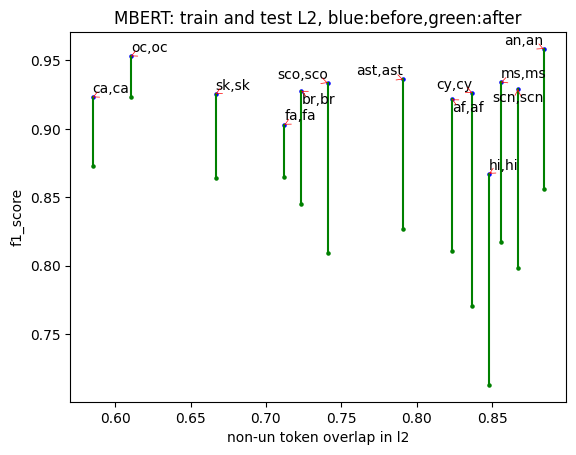

In [5]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='blue', s=5)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='green', s=5)

plt.title("MBERT: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(mbert_trainl2_testl2)):
    texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
    plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
#     texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train and test L2,cased, blue:before,green:after")
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

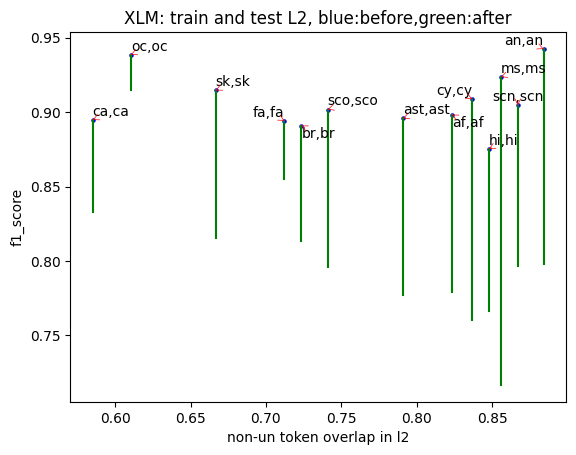

In [10]:
xlm_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl2_testl2)):
    texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_after'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score'])
# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train and test L2,cased, blue:before,green:after")

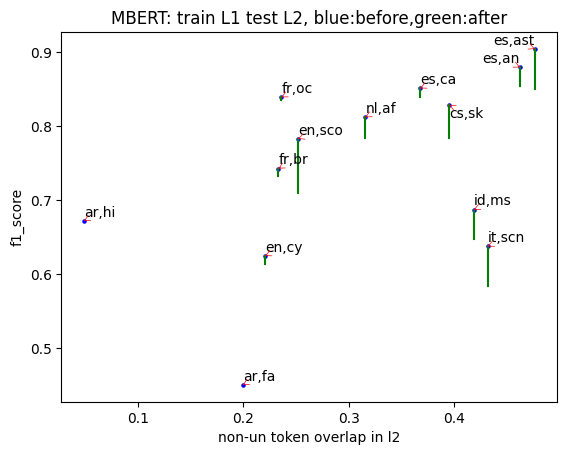

In [11]:
bert_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("MBERT: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(bert_trainl1_testl2)):
    texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_after'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
    plt.plot([bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['non-un token overlap in l2']],
            [bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train L1 test L2,cased, blue:before,green:after")

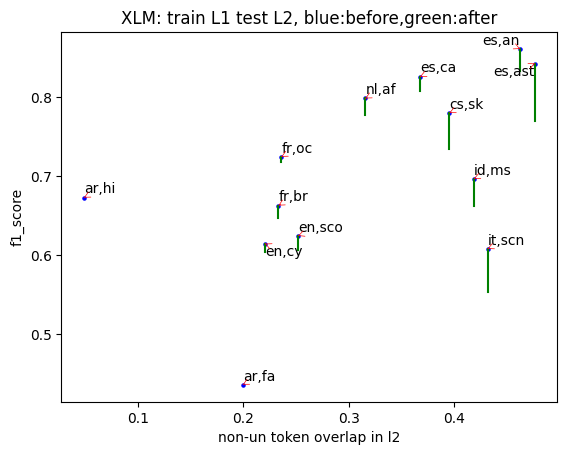

In [12]:
xlm_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl1_testl2)):
    texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_after'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2']],
            [xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train L1 test L2,cased, blue:before,green:after")

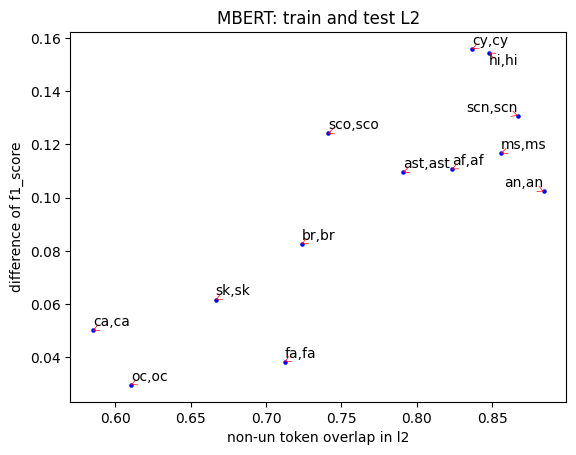

In [17]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before']-mbert_trainl2_testl2['f1_score_after'],c='blue', s=5)
plt.title("MBERT: train and test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(mbert_trainl2_testl2)):
    texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before']-mbert_trainl2_testl2.iloc[i]['f1_score_after'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train and test L2,cased,difference")
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

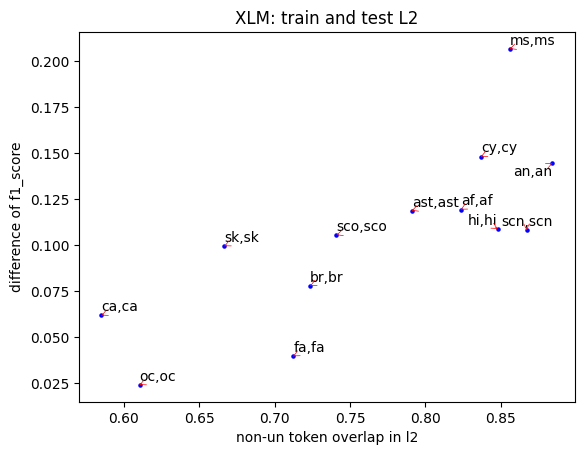

In [18]:
xlm_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_before']-xlm_trainl2_testl2['f1_score_after'],c='blue',s=5)
plt.title("XLM: train and test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(xlm_trainl2_testl2)):
    texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_before']-xlm_trainl2_testl2.iloc[i]['f1_score_after'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score'])
# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train and test L2,cased,difference")

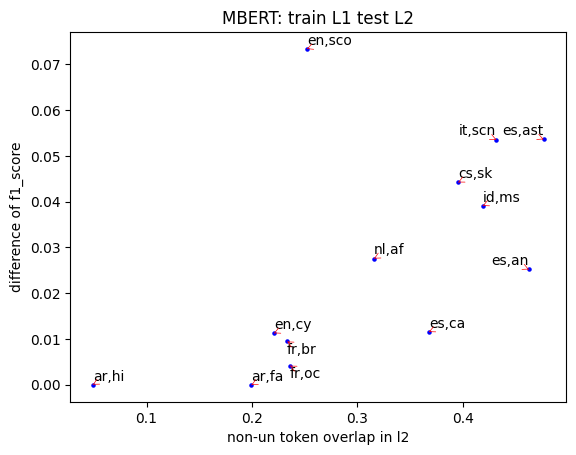

In [19]:
bert_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_before']-bert_trainl1_testl2['f1_score_after'],c='blue',s=5)
plt.title("MBERT: train L1 test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(bert_trainl1_testl2)):
    texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_before']-bert_trainl1_testl2.iloc[i]['f1_score_after'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train L1 test L2,cased,difference")

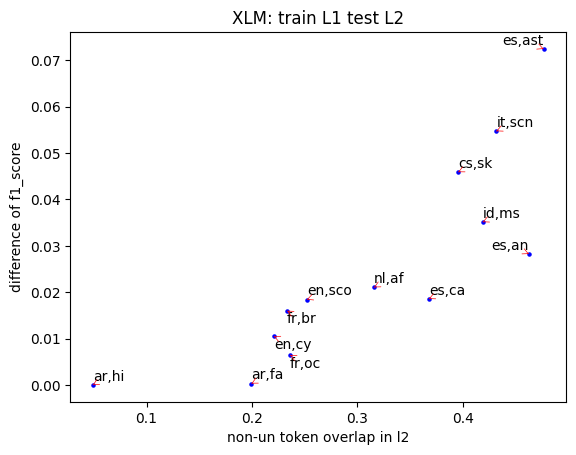

In [20]:
xlm_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_before']-xlm_trainl1_testl2['f1_score_after'],c='blue',s=5)
plt.title("XLM: train L1 test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(xlm_trainl1_testl2)):
    texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_before']-xlm_trainl1_testl2.iloc[i]['f1_score_after'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train L1 test L2,cased,difference")

# Perturbation 2

In [4]:
import pandas as pd
from simpletransformers.ner.ner_utils import read_examples_from_file
# ner_perturb_surrending=pd.read_csv('ner_perturb_surrending',sep=',', encoding='utf-8')
ner_perturb_surrending=pd.DataFrame(columns=["l1","l2","l1-name","l2-name","model_type","total_O_l2","same_O_l2","percentage_O_l2",
                                    "eval_loss","precision","recall","f1_score"])
import random
import torch
from transformers import BertForTokenClassification
from transformers import XLMRobertaForTokenClassification
from SimpleTransformers import NERModel
perturb_type='surrending'

for l_index,lang2 in language_accuracy.iterrows():
        language_source=lang2['l1']
        language_target=lang2['l2']
#         if(language_target=='br'):
        print(language_source)
        print(language_target)
        if lang2['model_type']=='bert':
#                 if not ((ner_perturb_surrending['l1']==language_source)&(ner_perturb_surrending['l2']==language_target)&(ner_perturb_surrending['model_type']==lang2['model_type'])).any():
                outputdir_bert=path+'/ner_results_lan/'+language_source+'_'+language_target+'_bert'+str(run)
                model = NERModel(lang2['model_type'], 
                            'bert-base-multilingual-cased',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_bert, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=BertForTokenClassification.from_pretrained(outputdir_bert)
                testdataset=path+language_target+'/dataset_test1.txt'
                out_overlap=dict()
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,lang=language_target,run=run,perturb=True,perturb_type=perturb_type,source_lang=language_source,out_overlap=out_overlap)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                     out_overlap["all_O"],out_overlap["same_O"],out_overlap["same_O"]/out_overlap["all_O"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_surrending.loc[l_index]=info


        if lang2['model_type']=='xlmroberta':
            if not ((ner_perturb_surrending['l1']==language_source)&(ner_perturb_surrending['l2']==language_target)&(ner_perturb_surrending['model_type']==lang2['model_type'])).any():
                outputdir_xlmr=path+'/ner_results_lan/'+language_source+'_'+language_target+'_xlmroberta'+str(run)
                model = NERModel(lang2['model_type'], 
                            'xlm-roberta-base',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_xlmr, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=XLMRobertaForTokenClassification.from_pretrained(outputdir_xlmr)
                testdataset=path+language_target+'/dataset_test1.txt'
                out_overlap=dict()
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,lang=language_target,run=run,perturb=True,perturb_type=perturb_type,source_lang=language_source,out_overlap=out_overlap)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                     out_overlap["all_O"],out_overlap["same_O"],out_overlap["same_O"]/out_overlap["all_O"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                print(out_overlap["all_O"],out_overlap["same_O"])
                ner_perturb_surrending.loc[l_index]=info

/s/babbage/b/nobackup/nblancha/merry/conda/envs/mbert_ner/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


fr
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

KeyboardInterrupt: 

In [ ]:
ner_perturb_surrending.to_csv('ner_perturb_surrending',sep=',', encoding='utf-8',index=False)
ner_perturb_surrending.to_excel('ner_perturb_surrending.xlsx')

In [8]:
ner_perturb_surrending=pd.read_csv('ner_perturb_surrending',sep=',', encoding='utf-8')
perturb_2_compare=language_accuracy.merge(ner_perturb_surrending,on=['l1','l2','l1-name','l2-name','model_type'],suffixes=('_before', '_after'))
perturb_2_compare
# perturb_2_compare=perturb_2_compare[['l1','l2','l1-name','l2-name','model_type','f1_score_before','f1_score_after']]

perturb_2_compare.to_csv('perturb_2_compare',sep=',', encoding='utf-8',index=False)
perturb_2_compare.to_excel('perturb_2_compare.xlsx')

In [9]:
import pandas as pd
perturb_2_compare=pd.read_csv('perturb_2_compare',sep=',', encoding='utf-8')
perturb_2_compare
# both_perturb_compare=perturb_1_compare.merge(perturb_2_compare,on=['l1','l2','l1-name','l2-name','model_type'],suffixes=('_1', '_2'))

,l1,l2,l1-name,l2-name,model_type,total tokens of l1,total tokens of l2,shared non-u in l1,shared non-u in l2,shared unique in both,...,precision_before,recall_before,f1_score_before,total_O_l2,same_O_l2,percentage_O_l2,eval_loss_after,precision_after,recall_after,f1_score_after
0,fr,br,french,breton,bert,49232,9406,9772,2194,638,...,0.699962,0.790970,0.742688,17179,85,0.004948,0.441756,0.699366,0.790753,0.742258
1,fr,br,french,breton,xlmroberta,49232,9406,9772,2194,638,...,0.621195,0.710555,0.662877,17179,85,0.004948,0.622032,0.621930,0.710990,0.663485
2,br,br,breton,breton,bert,37056,9406,19665,6806,3004,...,0.922879,0.932494,0.927661,17179,2672,0.155539,0.201143,0.879523,0.896896,0.888125
3,br,br,breton,breton,xlmroberta,37056,9406,19665,6806,3004,...,0.879720,0.902503,0.890966,17179,2672,0.155539,0.324530,0.814604,0.842437,0.828287
4,ar,fa,arabic,persian,bert,51951,14061,10314,2804,204,...,0.411632,0.496859,0.450248,5635,53,0.009406,0.779815,0.411365,0.496312,0.449864
5,ar,fa,arabic,persian,xlmroberta,51951,14061,10314,2804,204,...,0.390281,0.493581,0.435894,5635,53,0.009406,1.002739,0.389117,0.492215,0.434636
6,fa,fa,persian,persian,bert,56290,14061,33310,10016,2866,...,0.896607,0.909588,0.903051,5635,2651,0.470453,0.654633,0.553832,0.673040,0.607645
7,fa,fa,persian,persian,xlmroberta,56290,14061,33310,10016,2866,...,0.887752,0.900847,0.894252,5635,2651,0.470453,0.338950,0.738015,0.832559,0.782441
8,ar,hi,arabic,hindi,bert,51951,7961,8713,389,20,...,0.635863,0.712376,0.671948,5551,84,0.015132,0.533666,0.635863,0.712376,0.671948
9,ar,hi,arabic,hindi,xlmroberta,51951,7961,8713,389,20,...,0.628045,0.724717,0.672927,5551,84,0.015132,0.573741,0.628045,0.724717,0.672927


In [10]:
import pandas as pd
all_lang_info=perturb_2_compare
# all_lang_info=pd.read_csv('train_test_perturb_1_compare',sep=',', encoding='utf-8')
# all_lang_info[['l1','l2','l1-name','l2-name','model_type','f1_score_before','f1_score_after']]

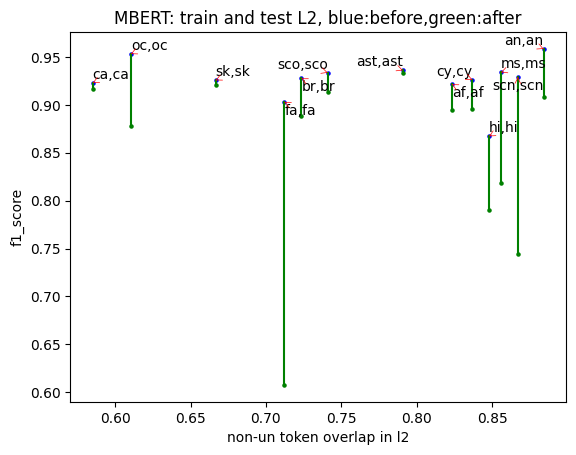

In [11]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='blue', s=5)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='green', s=5)

plt.title("MBERT: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(mbert_trainl2_testl2)):
    texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
    plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
#     texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train and test L2,cased, blue:before,green:after-perturb2")
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

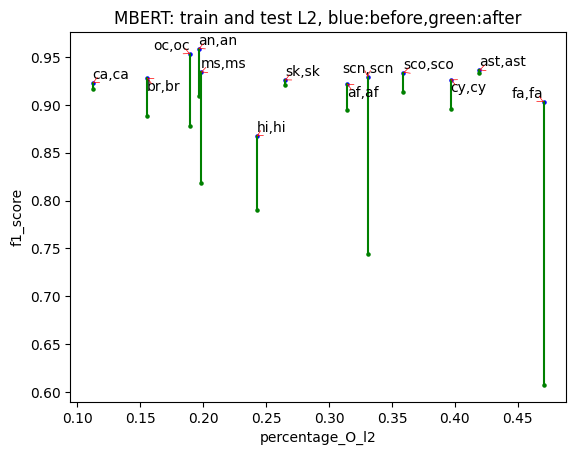

In [13]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_before'],c='blue', s=5)
plt.scatter(mbert_trainl2_testl2['percentage_O_l2'],mbert_trainl2_testl2['f1_score_after'],c='green', s=5)

plt.title("MBERT: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('percentage_O_l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(mbert_trainl2_testl2)):
    texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
    plt.plot([mbert_trainl2_testl2.iloc[i]['percentage_O_l2'],mbert_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
#     texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train and test L2,cased, blue:before,green:after-perturb22")
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

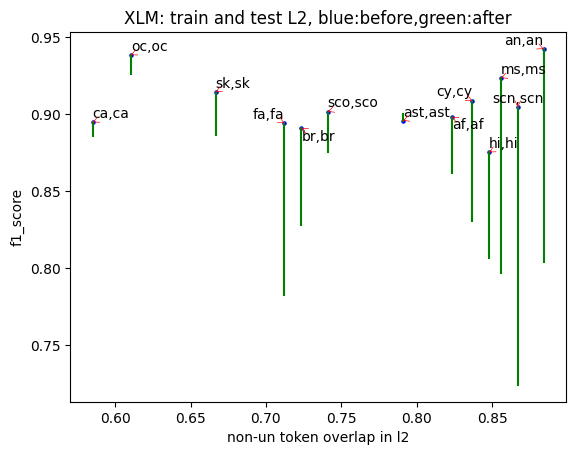

In [15]:
xlm_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl2_testl2)):
    texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_after'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score'])
# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train and test L2,cased, blue:before,green:after-perturb2")

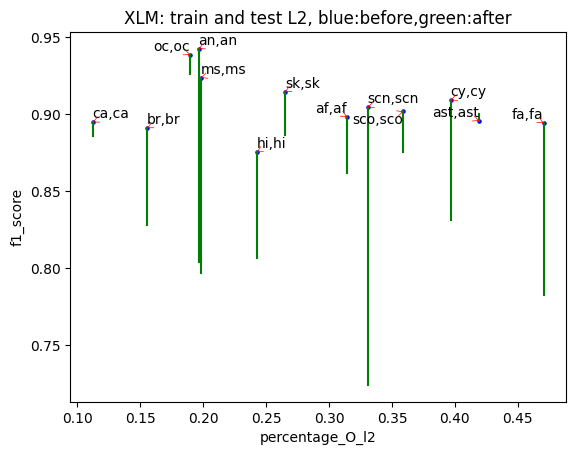

In [16]:
xlm_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(xlm_trainl2_testl2['percentage_O_l2'],xlm_trainl2_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('percentage_O_l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl2_testl2)):
    texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['percentage_O_l2'],xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_after'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl2_testl2.iloc[i]['percentage_O_l2'],xlm_trainl2_testl2.iloc[i]['percentage_O_l2']],
            [xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score'])
# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train and test L2,cased, blue:before,green:after-perturb22")

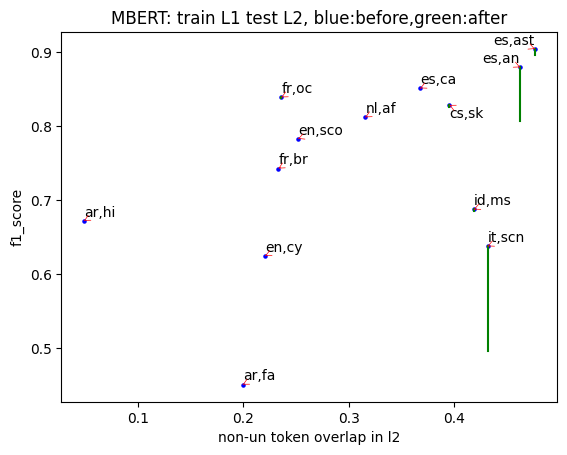

In [17]:
bert_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("MBERT: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(bert_trainl1_testl2)):
    texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_after'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
    plt.plot([bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['non-un token overlap in l2']],
            [bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train L1 test L2,cased, blue:before,green:after-perturb2")

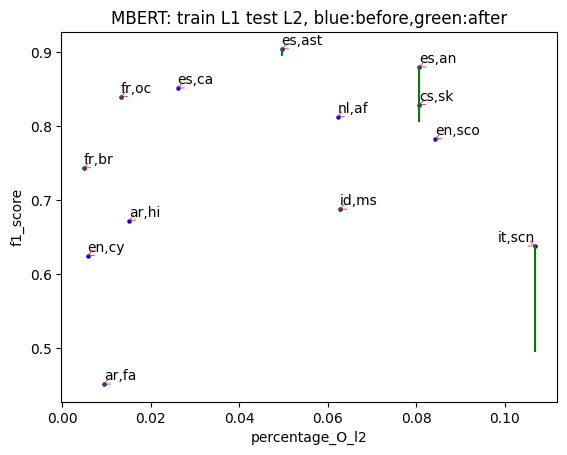

In [18]:
bert_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(bert_trainl1_testl2['percentage_O_l2'],bert_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("MBERT: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('percentage_O_l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(bert_trainl1_testl2)):
    texts.append(plt.text(bert_trainl1_testl2.iloc[i]['percentage_O_l2'],bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_after'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
    plt.plot([bert_trainl1_testl2.iloc[i]['percentage_O_l2'],bert_trainl1_testl2.iloc[i]['percentage_O_l2']],
            [bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train L1 test L2,cased, blue:before,green:after-perturb22")

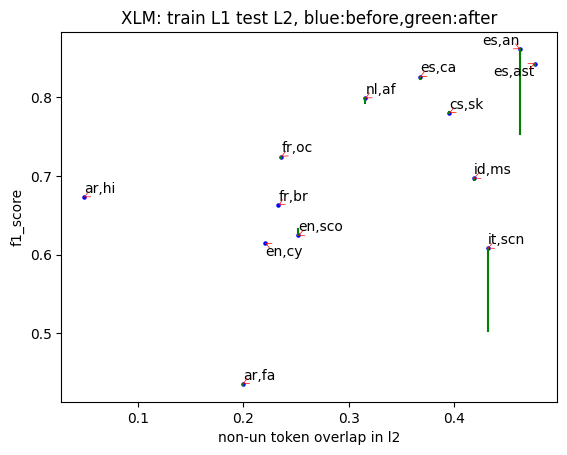

In [19]:
xlm_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl1_testl2)):
    texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_after'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2']],
            [xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train L1 test L2,cased, blue:before,green:after-perturb2")

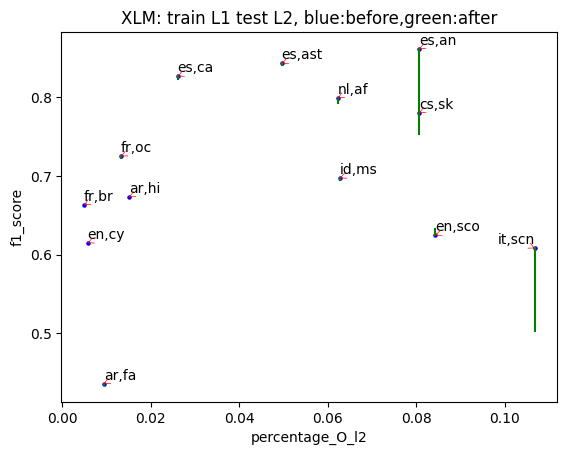

In [20]:
xlm_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(xlm_trainl1_testl2['percentage_O_l2'],xlm_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('percentage_O_l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl1_testl2)):
    texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['percentage_O_l2'],xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_after'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl1_testl2.iloc[i]['percentage_O_l2'],xlm_trainl1_testl2.iloc[i]['percentage_O_l2']],
            [xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train L1 test L2,cased, blue:before,green:after-perturb22")

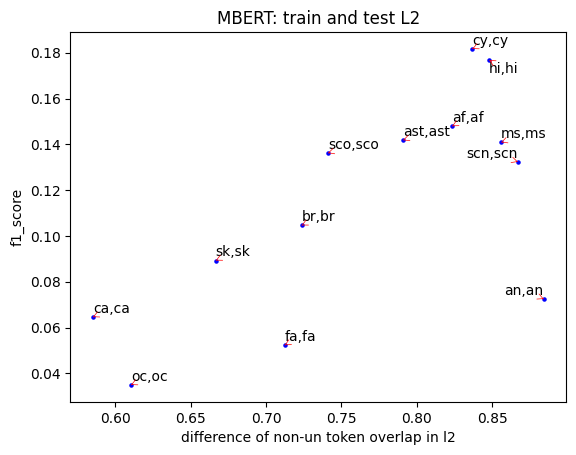

In [19]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before']-mbert_trainl2_testl2['f1_score_after'],c='blue', s=5)
plt.title("MBERT: train and test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('difference of non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(mbert_trainl2_testl2)):
    texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before']-mbert_trainl2_testl2.iloc[i]['f1_score_after'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train and test L2,cased,difference-perturb2")
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

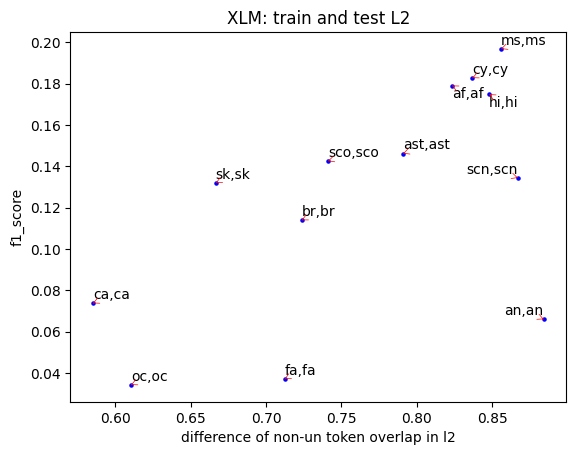

In [20]:
xlm_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_before']-xlm_trainl2_testl2['f1_score_after'],c='blue',s=5)
plt.title("XLM: train and test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('difference of non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl2_testl2)):
    texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_before']-xlm_trainl2_testl2.iloc[i]['f1_score_after'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score'])
# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train and test L2,cased,difference-perturb2")

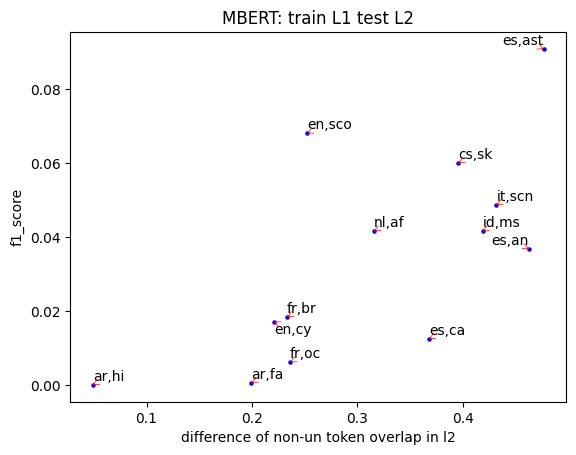

In [21]:
bert_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_before']-bert_trainl1_testl2['f1_score_after'],c='blue',s=5)
plt.title("MBERT: train L1 test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('difference of non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(bert_trainl1_testl2)):
    texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_before']-bert_trainl1_testl2.iloc[i]['f1_score_after'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train L1 test L2,cased,difference-perturb2")

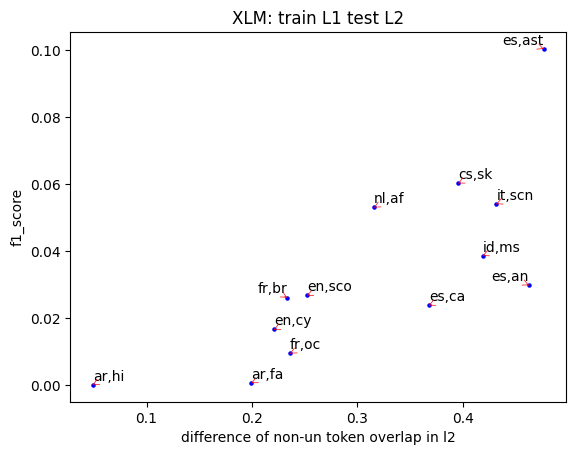

In [22]:
xlm_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_before']-xlm_trainl1_testl2['f1_score_after'],c='blue',s=5)
plt.title("XLM: train L1 test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('difference of non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl1_testl2)):
    texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_before']-xlm_trainl1_testl2.iloc[i]['f1_score_after'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train L1 test L2,cased,difference-perturb2")

# Combine perturb 1 and 2

In [1]:
path="/s/red/a/nobackup/cwc-ro/shadim/languages/"
run=1
import pandas as pd
language_accuracy=pd.read_csv('all_langs_overlap_train_test', sep=',', encoding='utf-8')
# language_accuracy

In [3]:
import pandas as pd
from simpletransformers.ner.ner_utils import read_examples_from_file
# ner_perturb_combine=pd.read_csv('ner_perturb_combine',sep=',', encoding='utf-8')
ner_perturb_combine=pd.DataFrame(columns=["l1","l2","l1-name","l2-name","model_type","total_O_l2","same_O_l2","percentage_O_l2",
                                    "eval_loss","precision","recall","f1_score"])
import random
import torch
from transformers import BertForTokenClassification
from transformers import XLMRobertaForTokenClassification
from SimpleTransformers import NERModel
perturb_type='combine'

for l_index,lang2 in language_accuracy.iterrows():
        language_source=lang2['l1']
        language_target=lang2['l2']
#         if(language_target=='br'):
        print(language_source)
        print(language_target)
        if lang2['model_type']=='bert':
#                 if not ((ner_perturb_combine['l1']==language_source)&(ner_perturb_combine['l2']==language_target)&(ner_perturb_combine['model_type']==lang2['model_type'])).any():
                outputdir_bert=path+'/ner_results_lan/'+language_source+'_'+language_target+'_bert'+str(run)
                model = NERModel(lang2['model_type'], 
                            'bert-base-multilingual-cased',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_bert, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=BertForTokenClassification.from_pretrained(outputdir_bert)
                testdataset=path+language_target+'/dataset_test1.txt'
                out_overlap=dict()
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,lang=language_target,run=run,perturb=True,perturb_type=perturb_type,source_lang=language_source,out_overlap=out_overlap)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                     out_overlap["all_O"],out_overlap["same_O"],out_overlap["same_O"]/out_overlap["all_O"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                ner_perturb_combine.loc[l_index]=info


        if lang2['model_type']=='xlmroberta':
#             if not ((ner_perturb_combine['l1']==language_source)&(ner_perturb_combine['l2']==language_target)&(ner_perturb_combine['model_type']==lang2['model_type'])).any():
                outputdir_xlmr=path+'/ner_results_lan/'+language_source+'_'+language_target+'_xlmroberta'+str(run)
                model = NERModel(lang2['model_type'], 
                            'xlm-roberta-base',
                            labels=["O",
                            "B-MISC",
                            "I-MISC",
                            "B-PER",
                            "I-PER",
                            "B-ORG",
                            "I-ORG",
                            "B-LOC",
                            "I-LOC"],
                            use_cuda=True,
                            args={'save_model_every_epoch':False, 'save_steps': 10000,'output_dir':outputdir_xlmr, 'evaluate_during_training':True,'overwrite_output_dir':True, 'classification_report': True, 'save_eval_checkpoints':False,'cache_dir':path+'/ner_cache_dir'})
                model.model=XLMRobertaForTokenClassification.from_pretrained(outputdir_xlmr)
                testdataset=path+language_target+'/dataset_test1.txt'
                out_overlap=dict()
                results, model_outputs, preds_list,accuracy_result=model.eval_model(testdataset,lang=language_target,run=run,perturb=True,perturb_type=perturb_type,source_lang=language_source,out_overlap=out_overlap)

                info=[lang2['l1'],lang2['l2'],lang2['l1-name'],lang2['l2-name'],lang2['model_type'],
                     out_overlap["all_O"],out_overlap["same_O"],out_overlap["same_O"]/out_overlap["all_O"],
                     results["eval_loss"],results["precision"],results["recall"],results["f1_score"]]
                print(info)
                print(out_overlap["all_O"],out_overlap["same_O"])
                ner_perturb_combine.loc[l_index]=info

fr
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/same_none_with_fr_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fr', 'br', 'french', 'breton', 'bert', 17179, 85, 0.0049479015076546945, 0.45381737156539387, 0.6839190221543163, 0.7772954200130237, 0.727623691963832]
fr
br


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/same_none_with_fr_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fr', 'br', 'french', 'breton', 'xlmroberta', 17179, 85, 0.0049479015076546945, 0.6426676923951282, 0.603752131893121, 0.6933623503808487, 0.6454619124797406]
17179 85
br
br


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_br1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_br1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/same_none_with_br_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['br', 'br', 'breton', 'breton', 'bert', 17179, 2672, 0.15553873915827462, 0.34835291705356625, 0.7901417389464777, 0.8086165836761203, 0.7992724160068478]
br
br


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_same_NER_with_br1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/train_test_unsame_NER_with_br1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/br/same_none_with_br_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['br', 'br', 'breton', 'breton', 'xlmroberta', 17179, 2672, 0.15553873915827462, 0.45858076629075856, 0.7230610134436402, 0.7591748099891422, 0.740677966101695]
17179 2672
ar
fa


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/same_none_with_ar_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ar', 'fa', 'arabic', 'persian', 'bert', 5635, 53, 0.009405501330967169, 0.7826838017979139, 0.41055253623188404, 0.49521988527724664, 0.4489290578184969]
ar
fa


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/same_none_with_ar_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ar', 'fa', 'arabic', 'persian', 'xlmroberta', 5635, 53, 0.009405501330967169, 1.0025423167387084, 0.38851715950787824, 0.49166894291177277, 0.4340487099107789]
5635 53
fa
fa


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_fa1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_fa1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/same_none_with_fa_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fa', 'fa', 'persian', 'persian', 'bert', 5635, 2651, 0.470452528837622, 0.7684119167811994, 0.514018691588785, 0.6309751434034416, 0.5665236051502146]
fa
fa


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_same_NER_with_fa1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/train_test_unsame_NER_with_fa1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/fa/same_none_with_fa_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['fa', 'fa', 'persian', 'persian', 'xlmroberta', 5635, 2651, 0.470452528837622, 0.4111172533605003, 0.6952563488260661, 0.7924631348989624, 0.7406840224604391]
5635 2651
ar
hi


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/same_none_with_ar_bert1.txt


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['ar', 'hi', 'arabic', 'hindi', 'bert', 5551, 84, 0.015132408575031526, 0.5336657308822347, 0.6358629130966952, 0.7123757284881728, 0.6719482619240097]
ar
hi


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_ar1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/same_none_with_ar_xlmroberta1.txt


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['ar', 'hi', 'arabic', 'hindi', 'xlmroberta', 5551, 84, 0.015132408575031526, 0.5737408099041598, 0.6280451574569221, 0.7247171751799795, 0.6729269457265638]
5551 84
hi
hi


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_hi1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_hi1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/same_none_with_hi_bert1.txt


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['hi', 'hi', 'hindi', 'hindi', 'bert', 5551, 1346, 0.24247883264276707, 0.6880406575761987, 0.6473429951690821, 0.6871794871794872, 0.6666666666666666]
hi
hi


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_same_NER_with_hi1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/train_test_unsame_NER_with_hi1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/hi/same_none_with_hi_xlmroberta1.txt


  0%|          | 0/2367 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

['hi', 'hi', 'hindi', 'hindi', 'xlmroberta', 5551, 1346, 0.24247883264276707, 0.6588692163192743, 0.6685264194289465, 0.6973639164669634, 0.6826407506702412]
5551 1346
en
sco


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/same_none_with_en_bert1.txt


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['en', 'sco', 'english', 'scots', 'bert', 8081, 681, 0.08427174854597204, 0.37693635032439426, 0.7000663570006636, 0.7339130434782609, 0.7165902530140941]
en
sco


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/same_none_with_en_xlmroberta1.txt


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['en', 'sco', 'english', 'scots', 'xlmroberta', 8081, 681, 0.08427174854597204, 0.545486240137997, 0.6162504396763981, 0.6096033402922756, 0.6129088682875634]
8081 681
sco
sco


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_sco1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_sco1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/same_none_with_sco_bert1.txt


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['sco', 'sco', 'scots', 'scots', 'bert', 8081, 2902, 0.3591139710431877, 0.30875103966593587, 0.7924791086350975, 0.7919276270006959, 0.7922032718412809]
sco
sco


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_same_NER_with_sco1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/train_test_unsame_NER_with_sco1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sco/same_none_with_sco_xlmroberta1.txt


  0%|          | 0/1943 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

['sco', 'sco', 'scots', 'scots', 'xlmroberta', 8081, 2902, 0.3591139710431877, 0.34881708219287144, 0.7404399323181049, 0.7597222222222222, 0.7499571550985432]
8081 2902
en
cy


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/same_none_with_en_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['en', 'cy', 'english', 'welsh', 'bert', 16804, 97, 0.005772435134491788, 0.6569851162218152, 0.5564165564165564, 0.6894613583138174, 0.6158351636858069]
en
cy


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_en1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/same_none_with_en_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['en', 'cy', 'english', 'welsh', 'xlmroberta', 16804, 97, 0.005772435134491788, 0.8013276273096112, 0.538475665748393, 0.6866510538641686, 0.6036026762738035]
16804 97
cy
cy


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_cy1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_cy1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/same_none_with_cy_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cy', 'cy', 'welsh', 'welsh', 'bert', 16804, 6665, 0.3966317543442038, 0.3542897881756366, 0.7338403041825095, 0.7669471715755025, 0.7500285746942507]
cy
cy


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_same_NER_with_cy1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/train_test_unsame_NER_with_cy1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/cy/same_none_with_cy_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cy', 'cy', 'welsh', 'welsh', 'xlmroberta', 16804, 6665, 0.3966317543442038, 0.3997643624745012, 0.6622103386809269, 0.6940681924334423, 0.6777651083238313]
16804 6665
es
ca


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/same_none_with_es_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['es', 'ca', 'spanish', 'catalan', 'bert', 9887, 258, 0.0260948720542126, 0.30492672549906086, 0.8222583643122676, 0.8585638039786512, 0.840018988844054]
es
ca


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/same_none_with_es_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['es', 'ca', 'spanish', 'catalan', 'xlmroberta', 9887, 258, 0.0260948720542126, 0.3728784737745606, 0.7716749886518384, 0.825643516270034, 0.7977475363679024]
9887 258
ca
ca


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_ca1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_ca1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/same_none_with_ca_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ca', 'ca', 'catalan', 'catalan', 'bert', 9887, 1111, 0.11236977849701628, 0.23794229581685378, 0.8526290969111059, 0.8770312878971622, 0.8646580583452893]
ca
ca


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_same_NER_with_ca1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/train_test_unsame_NER_with_ca1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ca/same_none_with_ca_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ca', 'ca', 'catalan', 'catalan', 'xlmroberta', 9887, 1111, 0.11236977849701628, 0.3148998214142887, 0.808560677328316, 0.8344660194174758, 0.8213091256569517]
9887 1111
cs
sk


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_cs1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_cs1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/same_none_with_cs_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cs', 'sk', 'czech', 'slovak', 'bert', 17295, 1395, 0.08065915004336513, 0.28442527460450295, 0.7569729286300246, 0.8022169093675288, 0.7789384826421863]
cs
sk


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_cs1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_cs1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/same_none_with_cs_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['cs', 'sk', 'czech', 'slovak', 'xlmroberta', 17295, 1395, 0.08065915004336513, 0.3430615185632615, 0.7226185480486781, 0.7486956521739131, 0.7354260089686099]
17295 1395
sk
sk


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_sk1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_sk1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/same_none_with_sk_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['sk', 'sk', 'slovak', 'slovak', 'bert', 17295, 4582, 0.26493206128939, 0.20715399002388532, 0.8448682236983073, 0.8555001084834021, 0.8501509271237602]
sk
sk


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_same_NER_with_sk1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/train_test_unsame_NER_with_sk1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/sk/same_none_with_sk_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['sk', 'sk', 'slovak', 'slovak', 'xlmroberta', 17295, 4582, 0.26493206128939, 0.29419367823546466, 0.7667304015296367, 0.7833731278489255, 0.7749624221601888]
17295 4582
id
ms


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_id1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_id1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/same_none_with_id_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['id', 'ms', 'indonesian', 'malay', 'bert', 5306, 333, 0.06275914059555221, 0.5683476709052395, 0.5941515285777581, 0.7115945874237198, 0.647591452372329]
id
ms


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_id1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_id1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/same_none_with_id_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['id', 'ms', 'indonesian', 'malay', 'xlmroberta', 5306, 333, 0.06275914059555221, 0.44970370235988444, 0.6066636851520573, 0.7192470837751855, 0.6581756428918002]
5306 333
ms
ms


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_ms1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_ms1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/same_none_with_ms_bert1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ms', 'ms', 'malay', 'malay', 'bert', 5306, 1052, 0.19826611383339615, 0.6753947179400507, 0.6807511737089202, 0.7305754441792628, 0.7047838321821438]
ms
ms


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_same_NER_with_ms1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/train_test_unsame_NER_with_ms1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ms/same_none_with_ms_xlmroberta1.txt


  0%|          | 0/3401 [00:00<?, ?it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

['ms', 'ms', 'malay', 'malay', 'xlmroberta', 5306, 1052, 0.19826611383339615, 0.7527865511091959, 0.5453339230429014, 0.6539379474940334, 0.5947184372362233]
5306 1052
fr
oc


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/same_none_with_fr_bert1.txt


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['fr', 'oc', 'french', 'occitan', 'bert', 13198, 176, 0.013335353841491135, 0.26444547070106644, 0.8140422284406004, 0.8549292011755276, 0.8339848840239771]
fr
oc


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_fr1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/same_none_with_fr_xlmroberta1.txt


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['fr', 'oc', 'french', 'occitan', 'xlmroberta', 13198, 176, 0.013335353841491135, 0.3979232391412975, 0.6858042635658915, 0.7563451776649747, 0.7193495108626604]
13198 176
oc
oc


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_oc1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_oc1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/same_none_with_oc_bert1.txt


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['oc', 'oc', 'occitan', 'occitan', 'bert', 13198, 2503, 0.18964994696166085, 0.43359936971256474, 0.8255813953488372, 0.8526821457165733, 0.8389129578574241]
oc
oc


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_same_NER_with_oc1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/train_test_unsame_NER_with_oc1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/oc/same_none_with_oc_xlmroberta1.txt


  0%|          | 0/3383 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

['oc', 'oc', 'occitan', 'occitan', 'xlmroberta', 13198, 2503, 0.18964994696166085, 0.17205483208601166, 0.885914760914761, 0.9102803738317757, 0.8979323060713815]
13198 2503
nl
af


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_nl1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_nl1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/same_none_with_nl_bert1.txt


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['nl', 'af', 'dutch', 'african', 'bert', 24636, 1534, 0.06226660172105861, 0.24334438539462516, 0.743061224489796, 0.8347088491517652, 0.7862232779097388]
nl
af


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_nl1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_nl1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/same_none_with_nl_xlmroberta1.txt


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['nl', 'af', 'dutch', 'african', 'xlmroberta', 24636, 1534, 0.06226660172105861, 0.25682904338086576, 0.726397706328077, 0.8167165553764679, 0.7689139388684155]
24636 1534
af
af


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_af1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_af1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/same_none_with_af_bert1.txt


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['af', 'af', 'african', 'african', 'bert', 24636, 7745, 0.3143773339827894, 0.24109531425921296, 0.7744595498105639, 0.7953765163653009, 0.7847786811201445]
af
af


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_same_NER_with_af1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/train_test_unsame_NER_with_af1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/af/same_none_with_af_xlmroberta1.txt


  0%|          | 0/2960 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

['af', 'af', 'african', 'african', 'xlmroberta', 24636, 7745, 0.3143773339827894, 0.2453306486074989, 0.7444321940463065, 0.7759135830843484, 0.7598469502588341]
24636 7745
it
scn


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_it1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_it1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/same_none_with_it_bert1.txt


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['it', 'scn', 'italian', 'sicilian', 'bert', 2247, 240, 0.1068090787716956, 1.2506989874518835, 0.40662438336856943, 0.5147190008920607, 0.45433070866141734]
it
scn


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_it1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_it1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/same_none_with_it_xlmroberta1.txt


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['it', 'scn', 'italian', 'sicilian', 'xlmroberta', 2247, 240, 0.1068090787716956, 1.4158317878842355, 0.42745098039215684, 0.48617305976806424, 0.4549248747913189]
2247 240
scn
scn


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_scn1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_scn1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/same_none_with_scn_bert1.txt


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['scn', 'scn', 'sicilian', 'sicilian', 'bert', 2247, 743, 0.33066310636404095, 1.0347575830080762, 0.6208299430431244, 0.6800356506238859, 0.6490854955338154]
scn
scn


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_same_NER_with_scn1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/train_test_unsame_NER_with_scn1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/scn/same_none_with_scn_xlmroberta1.txt


  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

['scn', 'scn', 'sicilian', 'sicilian', 'xlmroberta', 2247, 743, 0.33066310636404095, 1.0090368897475015, 0.5978792822185971, 0.6538804638715433, 0.6246271836386877]
2247 743
es
an


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/same_none_with_es_bert1.txt


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['es', 'an', 'spanish', 'aragonese', 'bert', 6187, 499, 0.08065298205915629, 0.43641404839343856, 0.751434034416826, 0.799051169095222, 0.7745114140252916]
es
an


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/same_none_with_es_xlmroberta1.txt


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['es', 'an', 'spanish', 'aragonese', 'xlmroberta', 6187, 499, 0.08065298205915629, 0.6764151945932763, 0.7177127834373973, 0.7398373983739838, 0.7286071726438699]
6187 499
an
an


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_an1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_an1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/same_none_with_an_bert1.txt


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['an', 'an', 'aragonese', 'aragonese', 'bert', 6187, 1215, 0.19637950541457896, 0.5110088746210212, 0.7599002182725288, 0.8249830737982397, 0.7911053400422009]
an
an


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_same_NER_with_an1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/train_test_unsame_NER_with_an1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/an/same_none_with_an_xlmroberta1.txt


  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

['an', 'an', 'aragonese', 'aragonese', 'xlmroberta', 6187, 1215, 0.19637950541457896, 0.9252626592272881, 0.6388276079420108, 0.6850287259209192, 0.6611219830397913]
6187 1215
es
ast


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/same_none_with_es_bert1.txt


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['es', 'ast', 'spanish', 'asturian', 'bert', 5240, 260, 0.04961832061068702, 0.2939622174782146, 0.8256880733944955, 0.8669476219145094, 0.8458149779735684]
es
ast


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_es1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/same_none_with_es_xlmroberta1.txt


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['es', 'ast', 'spanish', 'asturian', 'xlmroberta', 5240, 260, 0.04961832061068702, 0.4125843516417912, 0.7289156626506024, 0.8013245033112583, 0.7634069400630913]
5240 260
ast
ast


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and a

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_ast1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_ast1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/same_none_with_ast_bert1.txt


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['ast', 'ast', 'asturian', 'asturian', 'bert', 5240, 2197, 0.41927480916030535, 0.43552258624196316, 0.8040416411512553, 0.7904876580373269, 0.7972070431086824]
ast
ast


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to us

/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_same_NER_with_ast1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/train_test_unsame_NER_with_ast1.txt r
/s/red/a/nobackup/cwc-ro/shadim/languages/ast/same_none_with_ast_xlmroberta1.txt


  0%|          | 0/1120 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

['ast', 'ast', 'asturian', 'asturian', 'xlmroberta', 5240, 2197, 0.41927480916030535, 0.39686066031988176, 0.7501449275362319, 0.7790487658037327, 0.7643236857649143]
5240 2197


In [4]:
ner_perturb_combine.to_csv('ner_perturb_combine',sep=',', encoding='utf-8',index=False)
ner_perturb_combine.to_excel('ner_perturb_combine.xlsx')

In [5]:
import pandas as pd
language_accuracy=pd.read_csv('all_langs_overlap_train_test', sep=',', encoding='utf-8')
ner_perturb_combine=pd.read_csv('ner_perturb_combine', sep=',', encoding='utf-8')
perturb_12_compare=language_accuracy.merge(ner_perturb_combine[['l1','l2','l1-name','l2-name','model_type','f1_score']],on=['l1','l2','l1-name','l2-name','model_type'],suffixes=('_before', '_after'))
# perturb_1_compare=perturb_1_compare[['l1','l2','l1-name','l2-name','model_type','f1_score_before','f1_score_after']]

# perturb_1_compare.to_csv('train_test_perturb_1_compare',sep=',', encoding='utf-8',index=False)
# perturb_1_compare.to_excel('train_test_perturb_1_compare.xlsx')

In [6]:
import pandas as pd
all_lang_info=perturb_12_compare
# all_lang_info=pd.read_csv('train_test_perturb_1_compare',sep=',', encoding='utf-8')
# all_lang_info[['l1','l2','l1-name','l2-name','model_type','f1_score_before','f1_score_after']]

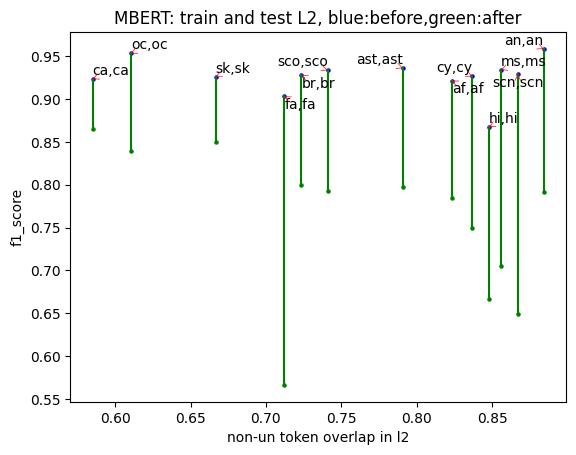

In [7]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'],c='blue', s=5)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_after'],c='green', s=5)

plt.title("MBERT: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(mbert_trainl2_testl2)):
    texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
    plt.plot([mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [mbert_trainl2_testl2.iloc[i]['f1_score_before'],mbert_trainl2_testl2.iloc[i]['f1_score_after']], 'g-')
#     texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_after'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train and test L2,cased, blue:before,green:after-combine")
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

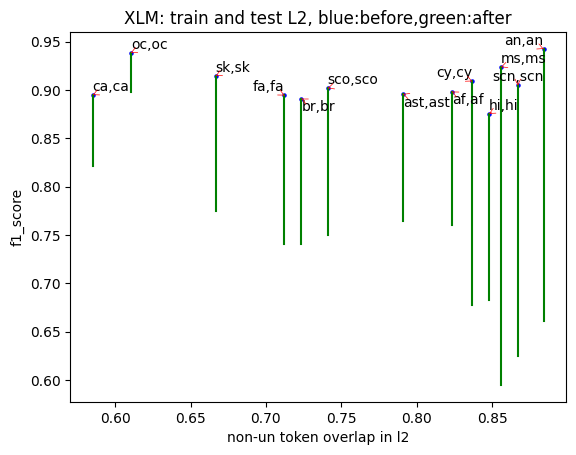

In [8]:
xlm_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train and test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl2_testl2)):
    texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_after'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2']],
            [xlm_trainl2_testl2.iloc[i]['f1_score_before'],xlm_trainl2_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score'])
# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train and test L2,cased, blue:before,green:after-combine")

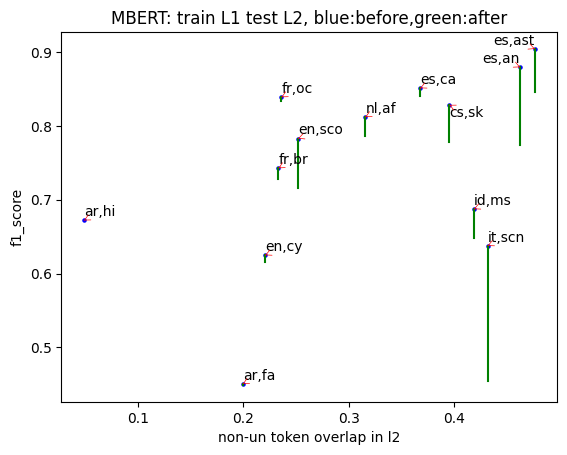

In [9]:
bert_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("MBERT: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(bert_trainl1_testl2)):
    texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_after'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
    plt.plot([bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['non-un token overlap in l2']],
            [bert_trainl1_testl2.iloc[i]['f1_score_before'],bert_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train L1 test L2,cased, blue:before,green:after-combine")

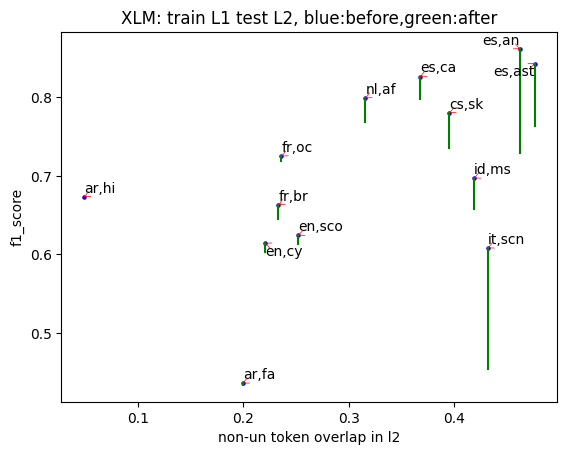

In [10]:
xlm_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_before'],c='blue',s=5)
# plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_after'],c='green',s=5)
plt.title("XLM: train L1 test L2, blue:before,green:after")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('f1_score')
texts = []
for i in range(len(xlm_trainl1_testl2)):
    texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
#     texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_after'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
    plt.plot([xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2']],
            [xlm_trainl1_testl2.iloc[i]['f1_score_before'],xlm_trainl1_testl2.iloc[i]['f1_score_after']],'g-')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train L1 test L2,cased, blue:before,green:after-combine")

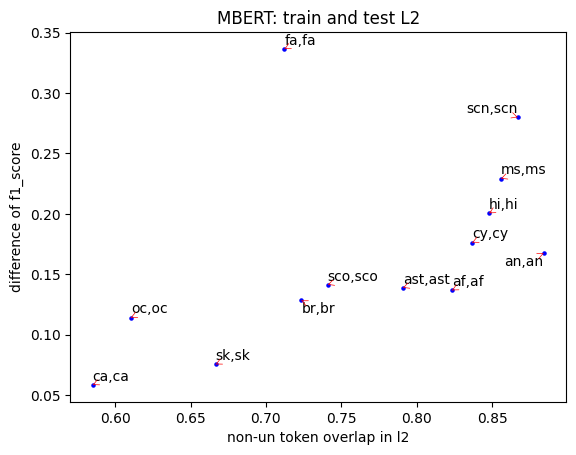

In [11]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
import  scipy

mbert_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before']-mbert_trainl2_testl2['f1_score_after'],c='blue', s=5)
plt.title("MBERT: train and test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(mbert_trainl2_testl2)):
    texts.append(plt.text(mbert_trainl2_testl2.iloc[i]['non-un token overlap in l2'],mbert_trainl2_testl2.iloc[i]['f1_score_before']-mbert_trainl2_testl2.iloc[i]['f1_score_after'],mbert_trainl2_testl2.iloc[i]['l1']+","+mbert_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mbert_trainl2_testl2['non-un token overlap in l2'],mbert_trainl2_testl2['f1_score_before'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train and test L2,cased,difference-combine")
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

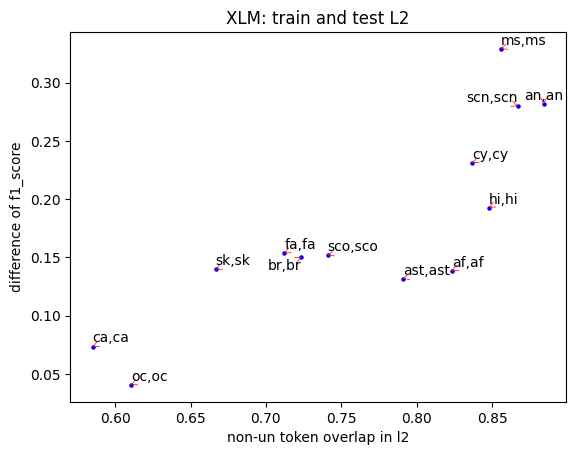

In [13]:
xlm_trainl2_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1!=all_lang_info.l2)].index)
plt.scatter(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score_before']-xlm_trainl2_testl2['f1_score_after'],c='blue',s=5)
plt.title("XLM: train and test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(xlm_trainl2_testl2)):
    texts.append(plt.text(xlm_trainl2_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl2_testl2.iloc[i]['f1_score_before']-xlm_trainl2_testl2.iloc[i]['f1_score_after'],xlm_trainl2_testl2.iloc[i]['l1']+","+xlm_trainl2_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl2_testl2['non-un token overlap in l2'],xlm_trainl2_testl2['f1_score'])
# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train and test L2,cased,difference-combine")

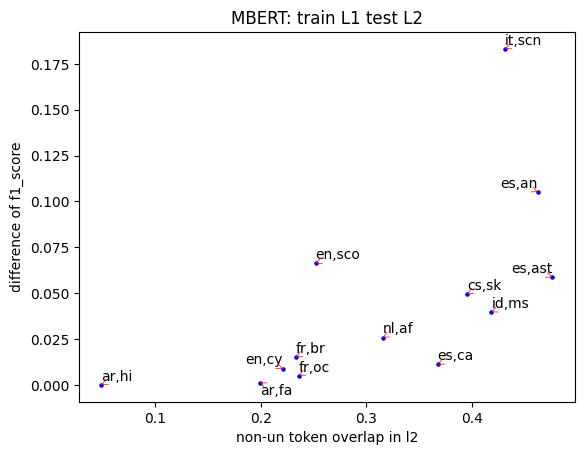

In [14]:
bert_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='bert') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score_before']-bert_trainl1_testl2['f1_score_after'],c='blue',s=5)
plt.title("MBERT: train L1 test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(bert_trainl1_testl2)):
    texts.append(plt.text(bert_trainl1_testl2.iloc[i]['non-un token overlap in l2'],bert_trainl1_testl2.iloc[i]['f1_score_before']-bert_trainl1_testl2.iloc[i]['f1_score_after'],bert_trainl1_testl2.iloc[i]['l1']+","+bert_trainl1_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bert_trainl1_testl2['non-un token overlap in l2'],bert_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("MBERT: train L1 test L2,cased,difference-combine")

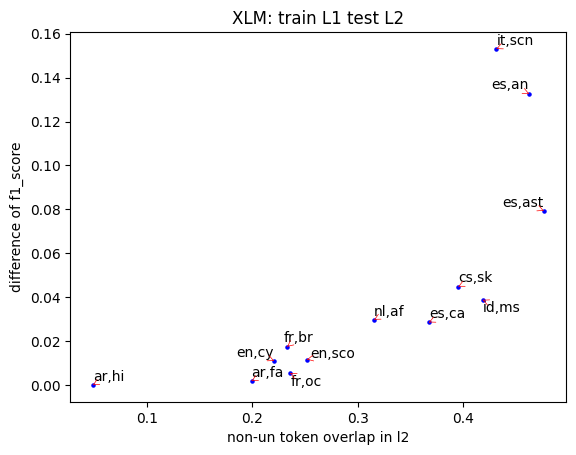

In [15]:
xlm_trainl1_testl2=all_lang_info.drop(all_lang_info[(all_lang_info.model_type!='xlmroberta') | (all_lang_info.l1==all_lang_info.l2)].index)
plt.scatter(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score_before']-xlm_trainl1_testl2['f1_score_after'],c='blue',s=5)
plt.title("XLM: train L1 test L2")
# plt.xlim(0, 1)
# plt.ylim(.2,1)
plt.xlabel('non-un token overlap in l2')
plt.ylabel('difference of f1_score')
texts = []
for i in range(len(xlm_trainl1_testl2)):
    texts.append(plt.text(xlm_trainl1_testl2.iloc[i]['non-un token overlap in l2'],xlm_trainl1_testl2.iloc[i]['f1_score_before']-xlm_trainl1_testl2.iloc[i]['f1_score_after'],xlm_trainl1_testl2.iloc[i]['l1']+","+xlm_trainl1_testl2.iloc[i]['l2']))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xlm_trainl1_testl2['non-un token overlap in l2'],xlm_trainl1_testl2['f1_score'])

# txt= "slope:" +str(slope)+",intercept:" +str(intercept)+",r_value:"+str(r_value)+",r-squared:"+str(r_value**2)+",p_value:"+str(p_value)+",std_err"+ str(std_err)
# print(txt)
plt.savefig("XLM: train L1 test L2,cased,difference-combine")

# Find distribution of named entities

In [31]:
distribution=pd.DataFrame(columns=["l2","B-MISC","I-MISC","B-PER","I-PER","B-ORG","I-ORG","B-LOC","I-LOC"])

In [32]:
vizited_languages=dict()
for l_index,lang2 in language_accuracy.iterrows():
    if not lang2['l2'] in vizited_languages.keys():
        labels={"B-MISC":0,
                "I-MISC":0,
                "B-PER":0,
                "I-PER":0,
                "B-ORG":0,
                "I-ORG":0,
                "B-LOC":0,
                "I-LOC":0}
        language_target=lang2['l2']
        testdataset=path+language_target+'/dataset_test1.txt'
        file=open(testdataset,'r')
        for line in file:
            line = line.strip()
            words = line.split(" ")
            for word in words:
                if word in labels:
                    labels[word] += 1

        all_count=sum(labels.values())
        for key in labels.keys():
            labels[key]=labels[key]/all_count
        info=[language_target]
        info.extend(labels.values())
        distribution.loc[l_index]=info
        vizited_languages[language_target]=info
    else:
        distribution.loc[l_index]=vizited_languages[language_target]

In [34]:
distribution.to_csv('ner_distribution',sep=',', encoding='utf-8',index=False)
distribution.to_excel('ner_distribution.xlsx')